Notebook summary:
- First look at parabiosis data
- Examines possible values for each column
- Quality control: Check levels of RNA (including mitochondrial RNA) and genes across the 4 test groups to make sure they're relatively similar and aren't contaminated
- Calculates transcriptional noise
- Plots included in the notebook:
    Bar plot: used for quality control and p values of
    Volcano plot: plots log fold between two groups

In [2]:
library(ggplot2)
library(tidyverse)
library(lubridate)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.1.1 but the current
version is 1.6.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed



In [3]:
filename <- "/gpfs/home/meyin/published_data/parabiosis/pb_combined.rds?download=1"
data <- readRDS(filename)

In [4]:
head(data, 10)

orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACCCATCGGTAGGA-1_1 GEX1        5461      2259         3.918696  
20_AAACGAACAACCAACT-1_1 GEX1        7542      2698         4.627420  
20_AAACGAACAGGTTCAT-1_1 GEX1       15424      3461         3.060166  
20_AAACGAACATGGAACG-1_1 GEX1       11212      3462         4.584374  
20_AAACGAAGTTGCGGCT-1_1 GEX1       10125      3303         3.348148  
20_AAACGAATCGTTCATT-1_1 GEX1        7902      2773         3.809162  
20_AAACGCTAGCCTAACT-1_1 GEX1        4324      1829         3.075856  
20_AAACGCTAGCGACCCT-1_1 GEX1       13439      3710         5.305454  
20_AAACGCTAGGTAGTCG-1_1 GEX1        8253      2821         4.640737  
20_AAACGCTTCGCAGTCG-1_1 GEX1        5762      2182         5.900729  
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACCCATCGGTAGGA-1_1 3                3               3               
20_AAACGAACAACCAACT-1_1 1                7               4               
20_AAACGAACAGGTTCAT-1_1 0                8               7               
20_AAACGAACATGGAACG-1_1 5                6               4               
20_AAACGAAGTTGCGGCT-1_1 4                9               5               
20_AAACGAATCGTTCATT-1_1 3                3               3               
20_AAACGCTAGCCTAACT-1_1 3                3               3               
20_AAACGCTAGCGACCCT-1_1 1                6               4               
20_AAACGCTAGGTAGTCG-1_1 1                7               1               
20_AAACGCTTCGCAGTCG-1_1 1                4               1               
                        RNA_snn_res.0.5 LMO_maxID                              
20_AAACCCATCGGTAGGA-1_1 3               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAACGAACAACCAACT-1_1 4               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC 
20_AAACGAACAGGTTCAT-1_1 8               BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC 
20_AAACGAACATGGAACG-1_1 6               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC 
20_AAACGAAGTTGCGGCT-1_1 5               BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG 
20_AAACGAATCGTTCATT-1_1 3               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG 
20_AAACGCTAGCCTAACT-1_1 3               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC 
20_AAACGCTAGCGACCCT-1_1 4               BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC 
20_AAACGCTAGGTAGTCG-1_1 4               BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC 
20_AAACGCTTCGCAGTCG-1_1 1               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
                        LMO_secondID                            ⋯ Experiment
20_AAACCCATCGGTAGGA-1_1 BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG  ⋯ 2020      
20_AAACGAACAACCAACT-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  ⋯ 2020      
20_AAACGAACAGGTTCAT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ 2020      
20_AAACGAACATGGAACG-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  ⋯ 2020      
20_AAACGAAGTTGCGGCT-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC ⋯ 2020      
20_AAACGAATCGTTCATT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ 2020      
20_AAACGCTAGCCTAACT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ 2020      
20_AAACGCTAGCGACCCT-1_1 BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT  ⋯ 2020      
20_AAACGCTAGGTAGTCG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC ⋯ 2020      
20_AAACGCTTCGCAGTCG-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  ⋯ 2020      
                        nGene nUMI percent.mito res.0.2 SCT_snn_res.0.5
20_AAACCCATCGGTAGGA-1_1 NA    NA   NA           NA      1              
20_AAACGAACAACCAACT-1_1 NA    NA   NA           NA      5              
20_AAACGAACAGGTTCAT-1_1 NA    NA   NA           NA      0              
20_AAACGAACATGGAACG-1_1 NA    NA   NA           NA      7              
20_AAACGAAGTTGCGGCT-1_1 NA    NA   NA           NA      8              
20_AAACGAATCGTTCATT-1_1 NA    NA   NA           NA      1              
20_AAACGCTAGCCTAACT-1_1 NA    NA   NA           NA      1              
20_AAACGCTAGCGACCCT-1_1 NA    NA   NA           NA      7              
20_AAACGCTAGGTAGTCG-1_1 NA    NA   NA           NA      5        

In [5]:
colnames(data@meta.data)

[1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "percent.mt"               
 [5] "RNA_snn_res.0.15"          "seurat_clusters"          
 [7] "RNA_snn_res.0.25"          "RNA_snn_res.0.5"          
 [9] "LMO_maxID"                 "LMO_secondID"             
[11] "LMO_margin"                "LMO_classification"       
[13] "LMO_classification.global" "hash.ID"                  
[15] "nCount_SCT"                "nFeature_SCT"             
[17] "SCT_snn_res.0.25"          "SCT_snn_res.0.2"          
[19] "Barcode"                   "Age"                      
[21] "Type"                      "Months"                   
[23] "Pair_ID"                   "Batch"                    
[25] "FACS"                      "LMO_Barcode"              
[27] "AgeCond"                   "S.Score"                  
[29] "G2M.Score"                 "Phase"                    
[31] "Celltype"                  "Experiment"               
[33] "nGene"                     "nUMI"                     
[35] "percent.mito"              "res.0.2"                  
[37] "SCT_snn_res.0.5"           "SCT_snn_res.0.6"          
[39] "SCT_snn_res.0.55"          "SCT_snn_res.0.52"         
[41] "SCT_snn_res.0.53"

In [6]:
unique(data@meta.data$Type)
unique(data@meta.data$Age)

[1] "Het" "Iso" NA

[1] "Young" "Old"   NA

In [7]:
table(data@meta.data$Type)
table(data@meta.data$Age)


 Het  Iso 
7481 6343 


  Old Young 
 5983  7841 

In [8]:
dim(data)
dimnames(data)

[1] 19103 25595

[[1]]
    [1] "Xkr4"           "Rp1"            "Sox17"          "Mrpl15"        
    [5] "Lypla1"         "Gm37988"        "Tcea1"          "Rgs20"         
    [9] "Gm16041"        "Atp6v1h"        "Oprk1"          "Rb1cc1"        
   [13] "4732440D04Rik"  "St18"           "Pcmtd1"         "Gm26901"       
   [17] "Sntg1"          "Rrs1"           "Adhfe1"         "3110035E14Rik" 
   [21] "Mybl1"          "Vcpip1"         "1700034P13Rik"  "Sgk3"          
   [25] "Mcmdc2"         "Snhg6"          "Tcf24"          "Ppp1r42"       
   [29] "Cops5"          "Cspp1"          "Arfgef1"        "Prex2"         
   [33] "A830018L16Rik"  "Sulf1"          "Slco5a1"        "Ncoa2"         
   [37] "Tram1"          "Lactb2"         "Xkr9"           "Eya1"          
   [41] "Gm9947"         "Msc"            "Kcnb2"          "Terf1"         
   [45] "Sbspon"         "4930444P10Rik"  "Rpl7"           "Rdh10"         
   [49] "Stau2"          "Ube2w"          "Eloc"           "D030040B21Rik" 
   [53] "Tmem70"         "Ly96"           "Jph1"           "Gdap1"         
   [57] "Gm28784"        "Pi15"           "Gm16070"        "Crispld1"      
   [61] "Tfap2b"         "Il17f"          "Mcm3"           "6720483E21Rik" 
   [65] "Paqr8"          "Efhc1"          "Tram2"          "Tmem14a"       
   [69] "Gsta3"          "Gm28836"        "Kcnq5"          "Rims1"         
   [73] "Gm27028"        "Gm29107"        "Ogfrl1"         "B3gat2"        
   [77] "Smap1"          "Sdhaf4"         "Fam135a"        "Col9a1"        
   [81] "Lmbrd1"         "Adgrb3"         "Gm597"          "Phf3"          
   [85] "Ptp4a1"         "Lgsn"           "Khdrbs2"        "Gm37724"       
   [89] "Prim2"          "Rab23"          "Bag2"           "Zfp451"        
   [93] "Bend6"          "Dst"            "Gm37233"        "Ccdc115"       
   [97] "Imp4"           "Ptpn18"         "4930568A12Rik"  "Amer3"         
  [101] "Arhgef4"        "Gm38336"        "Fam168b"        "Plekhb2"       
  [105] "1110002O04Rik"  "Hs6st1"         "Gm33280"        "Uggt1"         
  [109] "Neurl3"         "Arid5a"         "4930403P22Rik"  "Kansl3"        
  [113] "Lman2l"         "Cnnm4"          "Cnnm3"          "Gm38033"       
  [117] "Ankrd23"        "Gm42417"        "Ankrd39"        "Sema4c"        
  [121] "Fam178b"        "Cox5b"          "Actr1b"         "4933424G06Rik" 
  [125] "Zap70"          "Tmem131"        "Vwa3b"          "Inpp4a"        
  [129] "Coa5"           "Unc50"          "Mgat4a"         "2010300C02Rik" 
  [133] "Tsga10"         "Lipt1"          "Mitd1"          "Mrpl30"        
  [137] "Txndc9"         "Eif5b"          "Rev1"           "Aff3"          
  [141] "Gm16152"        "Lonrf2"         "Chst10"         "Pdcl3"         
  [145] "Npas2"          "Rpl31"          "Tbc1d8"         "Cnot11"        
  [149] "Rnf149"         "Creg2"          "D930019O06Rik"  "Rfx8"          
  [153] "Gm3646"         "1700066B17Rik"  "Map4k4"         "Il1r2"         
  [157] "Gm16894"        "Il1r1"          "Il1rl2"         "Il1rl1"        
  [161] "Il18r1"         "Il18rap"        "Slc9a2"         "Mfsd9"         
  [165] "Tmem182"        "Gm29260"        "Gm9915"         "Gm28175"       
  [169] "Pantr1"         "Pou3f3"         "Dalir"          "Mrps9"         
  [173] "Gpr45"          "Tgfbrap1"       "Gm28782"        "8430432A02Rik" 
  [177] "AI597479"       "Fhl2"           "Nck2"           "1500015O10Rik" 
  [181] "Gm29155"        "Gm29157"        "Gm29156"        "Uxs1"          
  [185] "Tpp2"           "Mettl21c"       "Gm8251"         "Tex30"         
  [189] "Kdelc1"         "Bivm"           "Ercc5"          "Gulp1"         
  [193] "Col3a1"         "Col5a2"         "Wdr75"          "Slc40a1"       
  [197] "Dnah7b"         "Dnah7c"         "Slc39a10"       "Gm28151"       
  [201] "4933411E06Rik"  "Tmeff2"         "Gm28322"        "Gm29325"       
  [205] "9330175M20Rik"  "Cavin2"         "Nabp1"          "Myo1b"         
  [209] "Stat4"          "Gm31812"        

In [9]:
table(data@meta.data$Celltype)


        Oligodendro           Microglia         Endothelial      Astrocyte_qNSC 
               9081                4625                3190                3713 
         Neuroblast            aNSC_NPC               Mural Macrophage_Tcell_NK 
               1678                1691                1024                 302 
                OPC           Ependymal             Doublet              Neuron 
                161                  98                   0                  32 

In [10]:
# Quality Control

In [11]:
metadata <- data@meta.data %>% filter(data@meta.data$Celltype != "Doublet")

In [12]:
table(data@meta.data$Celltype)


        Oligodendro           Microglia         Endothelial      Astrocyte_qNSC 
               9081                4625                3190                3713 
         Neuroblast            aNSC_NPC               Mural Macrophage_Tcell_NK 
               1678                1691                1024                 302 
                OPC           Ependymal             Doublet              Neuron 
                161                  98                   0                  32 

In [13]:
metadata <- metadata %>%
  mutate(AgeCond = paste0(substr(Age, 1, 1), "_", Type))

In [14]:
unique(metadata$hash.ID)

[1] "BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC"  
 [2] "BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC"   
 [3] "BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC"   
 [4] "BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG"   
 [5] "BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG"   
 [6] "BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT"   
 [7] "BC7-Old-Het-20.53-2A-B2-51000-GTACCTGT"   
 [8] "BC13-Old-Het-20.53-5A-B2-50000-CAGTTAGG"  
 [9] "BC11-Young-Iso-5.67-10A-B2-70700-GAGTCGAT"
[10] "BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC"   
[11] "BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG"
[12] "BC8-Young-Het-5.13-2B-B2-30500-GAAGCTTG"  
[13] "BC14-Young-Het-5.13-5B-B2-50100-AACCGAAC" 
[14] "BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC"  
[15] "BC23-Young-Iso-4.60-15A-B4-28000-ATCTACGG"
[16] "BC22-Young-Het-5.40-14B-B4-38000-CGATTAGC"
[17] "BC21-Old-Het-20.80-14A-B4-24000-GAGAGACT" 
[18] "BC24-Young-Iso-4.60-15B-B4-22800-TGTACCAG"
[19] NA

In [15]:
metadata <- metadata %>%
  mutate(ID = sub("-.*", "", hash.ID))

In [16]:
unique(metadata$ID)

[1] "BC2"  "BC3"  "BC4"  "BC6"  "BC1"  "BC5"  "BC7"  "BC13" "BC11" "BC9" 
[11] "BC12" "BC8"  "BC14" "BC10" "BC23" "BC22" "BC21" "BC24" NA

In [17]:
# Split off Old 'Control' (Iso) data
oisodata <- metadata %>% filter(AgeCond=="O_Iso")
head(oisodata)

orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACGAACAACCAACT-1_1 GEX1        7542      2698         4.627420  
20_AAACGAACAGGTTCAT-1_1 GEX1       15424      3461         3.060166  
20_AAACGAACATGGAACG-1_1 GEX1       11212      3462         4.584374  
20_AAACGAAGTTGCGGCT-1_1 GEX1       10125      3303         3.348148  
20_AAACGCTAGCCTAACT-1_1 GEX1        4324      1829         3.075856  
20_AAACGCTAGCGACCCT-1_1 GEX1       13439      3710         5.305454  
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACGAACAACCAACT-1_1 1                7               4               
20_AAACGAACAGGTTCAT-1_1 0                8               7               
20_AAACGAACATGGAACG-1_1 5                6               4               
20_AAACGAAGTTGCGGCT-1_1 4                9               5               
20_AAACGCTAGCCTAACT-1_1 3                3               3               
20_AAACGCTAGCGACCCT-1_1 1                6               4               
                        RNA_snn_res.0.5 LMO_maxID                             
20_AAACGAACAACCAACT-1_1 4               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC
20_AAACGAACAGGTTCAT-1_1 8               BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC
20_AAACGAACATGGAACG-1_1 6               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC
20_AAACGAAGTTGCGGCT-1_1 5               BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG
20_AAACGCTAGCCTAACT-1_1 3               BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC
20_AAACGCTAGCGACCCT-1_1 4               BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC
                        LMO_secondID                            ⋯ nGene nUMI
20_AAACGAACAACCAACT-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  ⋯ NA    NA  
20_AAACGAACAGGTTCAT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ NA    NA  
20_AAACGAACATGGAACG-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  ⋯ NA    NA  
20_AAACGAAGTTGCGGCT-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC ⋯ NA    NA  
20_AAACGCTAGCCTAACT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ NA    NA  
20_AAACGCTAGCGACCCT-1_1 BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT  ⋯ NA    NA  
                        percent.mito res.0.2 SCT_snn_res.0.5 SCT_snn_res.0.6
20_AAACGAACAACCAACT-1_1 NA           NA      5               5              
20_AAACGAACAGGTTCAT-1_1 NA           NA      0               7              
20_AAACGAACATGGAACG-1_1 NA           NA      7               8              
20_AAACGAAGTTGCGGCT-1_1 NA           NA      8               10             
20_AAACGCTAGCCTAACT-1_1 NA           NA      1               2              
20_AAACGCTAGCGACCCT-1_1 NA           NA      7               8              
                        SCT_snn_res.0.55 SCT_snn_res.0.52 SCT_snn_res.0.53 ID 
20_AAACGAACAACCAACT-1_1 5                4                7                BC3
20_AAACGAACAGGTTCAT-1_1 0                0                8                BC4
20_AAACGAACATGGAACG-1_1 7                4                6                BC3
20_AAACGAAGTTGCGGCT-1_1 8                7                9                BC6
20_AAACGCTAGCCTAACT-1_1 1                1                3                BC3
20_AAACGCTAGCGACCCT-1_1 7                4                6                BC4

In [18]:
# Split off Old Het data
ohetdata <- metadata %>% filter(AgeCond=="O_Het")
head(ohetdata)

orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACGAATCGTTCATT-1_1 GEX1        7902      2773         3.809162  
20_AAAGAACCACTGGATT-1_1 GEX1        7086      2607         4.106689  
20_AAAGAACCATACTGAC-1_1 GEX1        6149      2400         7.188161  
20_AAAGTCCAGTTGTCAC-1_1 GEX1        6349      1991         2.819342  
20_AACAAGAAGAACTCCT-1_1 GEX1        7780      2448         4.023136  
20_AACCAACGTCCCAAAT-1_1 GEX1       17656      4983         2.611010  
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACGAATCGTTCATT-1_1 3                3               3               
20_AAAGAACCACTGGATT-1_1 3                3               3               
20_AAAGAACCATACTGAC-1_1 1                4               1               
20_AAAGTCCAGTTGTCAC-1_1 0                8               0               
20_AACAAGAAGAACTCCT-1_1 0                1               0               
20_AACCAACGTCCCAAAT-1_1 10               19              10              
                        RNA_snn_res.0.5 LMO_maxID                             
20_AAACGAATCGTTCATT-1_1 3               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
20_AAAGAACCACTGGATT-1_1 3               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
20_AAAGAACCATACTGAC-1_1 1               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
20_AAAGTCCAGTTGTCAC-1_1 0               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
20_AACAAGAAGAACTCCT-1_1 0               BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
20_AACCAACGTCCCAAAT-1_1 13              BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG
                        LMO_secondID                            ⋯ nGene nUMI
20_AAACGAATCGTTCATT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ NA    NA  
20_AAAGAACCACTGGATT-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ NA    NA  
20_AAAGAACCATACTGAC-1_1 BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT  ⋯ NA    NA  
20_AAAGTCCAGTTGTCAC-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  ⋯ NA    NA  
20_AACAAGAAGAACTCCT-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC ⋯ NA    NA  
20_AACCAACGTCCCAAAT-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC ⋯ NA    NA  
                        percent.mito res.0.2 SCT_snn_res.0.5 SCT_snn_res.0.6
20_AAACGAATCGTTCATT-1_1 NA           NA      1               2              
20_AAAGAACCACTGGATT-1_1 NA           NA      1               2              
20_AAAGAACCATACTGAC-1_1 NA           NA      4               4              
20_AAAGTCCAGTTGTCAC-1_1 NA           NA      0               7              
20_AACAAGAAGAACTCCT-1_1 NA           NA      0               1              
20_AACCAACGTCCCAAAT-1_1 NA           NA      18              19             
                        SCT_snn_res.0.55 SCT_snn_res.0.52 SCT_snn_res.0.53 ID 
20_AAACGAATCGTTCATT-1_1 1                1                3                BC1
20_AAAGAACCACTGGATT-1_1 1                1                3                BC1
20_AAAGAACCATACTGAC-1_1 4                5                4                BC1
20_AAAGTCCAGTTGTCAC-1_1 0                0                8                BC1
20_AACAAGAAGAACTCCT-1_1 0                0                1                BC1
20_AACCAACGTCCCAAAT-1_1 19               13               19               BC1

In [19]:
# Split off Young Iso data
yisodata <- metadata %>% filter(AgeCond=="Y_Iso")
head(yisodata)

orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACCCAGTACCGTGC-1_2 GEX2        3131      1434         4.535292  
20_AAACCCATCCCGGTAG-1_2 GEX2       10213      3255         3.446588  
20_AAACGAAAGCTCTGTA-1_2 GEX2        3182      1497         3.048397  
20_AAACGCTCAACTCCAA-1_2 GEX2        5224      2231         4.364472  
20_AAACGCTTCGAGCCTG-1_2 GEX2        5157      2078         5.080473  
20_AAAGGATAGTAAGCAT-1_2 GEX2        2550      1234         0.745098  
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACCCAGTACCGTGC-1_2 NA               3               NA              
20_AAACCCATCCCGGTAG-1_2 NA               6               NA              
20_AAACGAAAGCTCTGTA-1_2 NA               2               NA              
20_AAACGCTCAACTCCAA-1_2 NA               0               NA              
20_AAACGCTTCGAGCCTG-1_2 NA               4               NA              
20_AAAGGATAGTAAGCAT-1_2 NA               8               NA              
                        RNA_snn_res.0.5
20_AAACCCAGTACCGTGC-1_2 2              
20_AAACCCATCCCGGTAG-1_2 4              
20_AAACGAAAGCTCTGTA-1_2 3              
20_AAACGCTCAACTCCAA-1_2 1              
20_AAACGCTTCGAGCCTG-1_2 1              
20_AAAGGATAGTAAGCAT-1_2 0              
                        LMO_maxID                                
20_AAACCCAGTACCGTGC-1_2 BC11-Young-Iso-5.67-10A-B2-70700-GAGTCGAT
20_AAACCCATCCCGGTAG-1_2 BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG
20_AAACGAAAGCTCTGTA-1_2 BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG
20_AAACGCTCAACTCCAA-1_2 BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG
20_AAACGCTTCGAGCCTG-1_2 BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG
20_AAAGGATAGTAAGCAT-1_2 BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG
                        LMO_secondID                            ⋯ nGene nUMI
20_AAACCCAGTACCGTGC-1_2 BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC ⋯ NA    NA  
20_AAACCCATCCCGGTAG-1_2 BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC  ⋯ NA    NA  
20_AAACGAAAGCTCTGTA-1_2 BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC ⋯ NA    NA  
20_AAACGCTCAACTCCAA-1_2 BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC ⋯ NA    NA  
20_AAACGCTTCGAGCCTG-1_2 BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC  ⋯ NA    NA  
20_AAAGGATAGTAAGCAT-1_2 BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC ⋯ NA    NA  
                        percent.mito res.0.2 SCT_snn_res.0.5 SCT_snn_res.0.6
20_AAACCCAGTACCGTGC-1_2 NA           NA      1               2              
20_AAACCCATCCCGGTAG-1_2 NA           NA      7               8              
20_AAACGAAAGCTCTGTA-1_2 NA           NA      3               3              
20_AAACGCTCAACTCCAA-1_2 NA           NA      2               0              
20_AAACGCTTCGAGCCTG-1_2 NA           NA      4               4              
20_AAAGGATAGTAAGCAT-1_2 NA           NA      0               7              
                        SCT_snn_res.0.55 SCT_snn_res.0.52 SCT_snn_res.0.53 ID  
20_AAACCCAGTACCGTGC-1_2 1                1                3                BC11
20_AAACCCATCCCGGTAG-1_2 7                4                6                BC12
20_AAACGAAAGCTCTGTA-1_2 3                3                2                BC12
20_AAACGCTCAACTCCAA-1_2 5                2                0                BC12
20_AAACGCTTCGAGCCTG-1_2 4                5                4                BC12
20_AAAGGATAGTAAGCAT-1_2 0                0                8                BC12

In [20]:
# Split off Young Het data
yhetdata <- metadata %>% filter(AgeCond=="Y_Het")
head(yhetdata)

orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACCCATCGGTAGGA-1_1 GEX1        5461      2259         3.9186962 
20_AAACGCTTCGCAGTCG-1_1 GEX1        5762      2182         5.9007289 
20_AAAGGATAGGAAACGA-1_1 GEX1       12454      3794         4.0308335 
20_AAATGGATCACAATGC-1_1 GEX1        6266      2143         2.0108522 
20_AACCAACTCTCCTGTG-1_1 GEX1        3006      1403         0.7984032 
20_AACCACAAGCATGCAG-1_1 GEX1       14970      3999         5.6112224 
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACCCATCGGTAGGA-1_1 3                3               3               
20_AAACGCTTCGCAGTCG-1_1 1                4               1               
20_AAAGGATAGGAAACGA-1_1 4                9               5               
20_AAATGGATCACAATGC-1_1 0                1               0               
20_AACCAACTCTCCTGTG-1_1 0                8               0               
20_AACCACAAGCATGCAG-1_1 1                4               1               
                        RNA_snn_res.0.5 LMO_maxID                              
20_AAACCCATCGGTAGGA-1_1 3               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAACGCTTCGCAGTCG-1_1 1               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAAGGATAGGAAACGA-1_1 5               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAATGGATCACAATGC-1_1 0               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCAACTCTCCTGTG-1_1 0               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCACAAGCATGCAG-1_1 1               BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
                        LMO_secondID                           ⋯ nGene nUMI
20_AAACCCATCGGTAGGA-1_1 BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG ⋯ NA    NA  
20_AAACGCTTCGCAGTCG-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC ⋯ NA    NA  
20_AAAGGATAGGAAACGA-1_1 BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG ⋯ NA    NA  
20_AAATGGATCACAATGC-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC ⋯ NA    NA  
20_AACCAACTCTCCTGTG-1_1 BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT ⋯ NA    NA  
20_AACCACAAGCATGCAG-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG ⋯ NA    NA  
                        percent.mito res.0.2 SCT_snn_res.0.5 SCT_snn_res.0.6
20_AAACCCATCGGTAGGA-1_1 NA           NA      1               2              
20_AAACGCTTCGCAGTCG-1_1 NA           NA      4               4              
20_AAAGGATAGGAAACGA-1_1 NA           NA      8               10             
20_AAATGGATCACAATGC-1_1 NA           NA      0               1              
20_AACCAACTCTCCTGTG-1_1 NA           NA      0               7              
20_AACCACAAGCATGCAG-1_1 NA           NA      4               4              
                        SCT_snn_res.0.55 SCT_snn_res.0.52 SCT_snn_res.0.53 ID 
20_AAACCCATCGGTAGGA-1_1 1                1                3                BC2
20_AAACGCTTCGCAGTCG-1_1 4                5                4                BC2
20_AAAGGATAGGAAACGA-1_1 8                7                9                BC2
20_AAATGGATCACAATGC-1_1 0                0                1                BC2
20_AACCAACTCTCCTGTG-1_1 0                0                8                BC2
20_AACCACAAGCATGCAG-1_1 4                5                4                BC2

In [21]:
unique(oisodata$ID)
unique(ohetdata$ID)
unique(yisodata$ID)
unique(yhetdata$ID)

[1] "BC3"  "BC4"  "BC6"  "BC5"  "BC9"  "BC10"

[1] "BC1"  "BC7"  "BC13" "BC21"

[1] "BC11" "BC12" "BC23" "BC24"

[1] "BC2"  "BC8"  "BC14" "BC22"

In [22]:
metadata <- metadata %>%
  filter(AgeCond != "NA_NA")

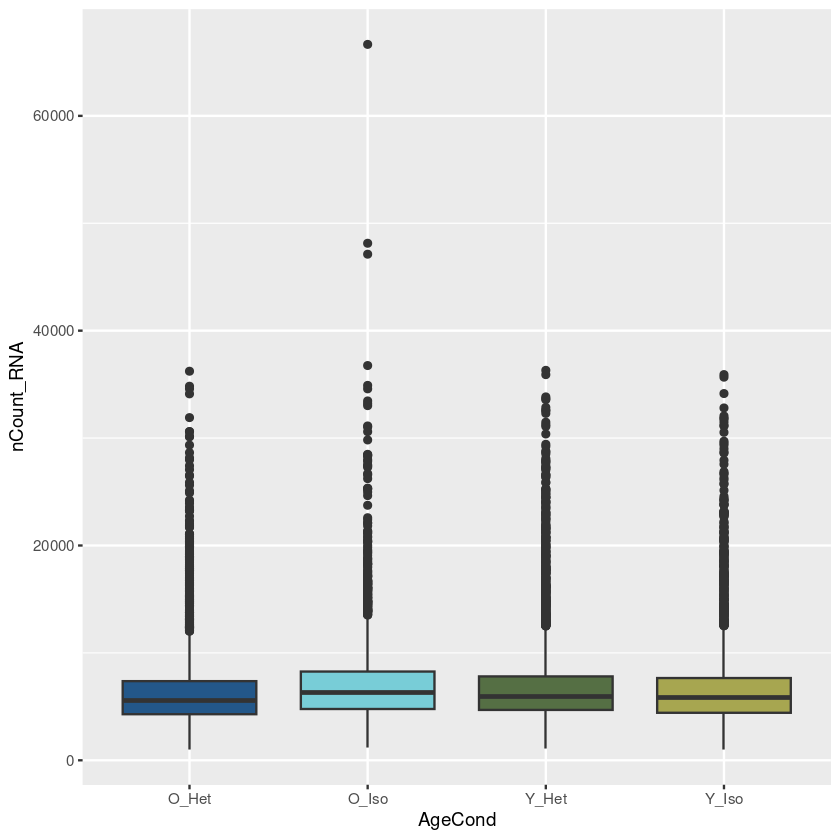

In [23]:
# Compare the amount of RNA in a mouse across young/old and het/iso
plot <- ggplot(metadata, aes(x=AgeCond, y=nCount_RNA)) + 
  geom_boxplot(fill=c("#235789", "#78CDD7", "#556F44", "#A7A650"))
plot

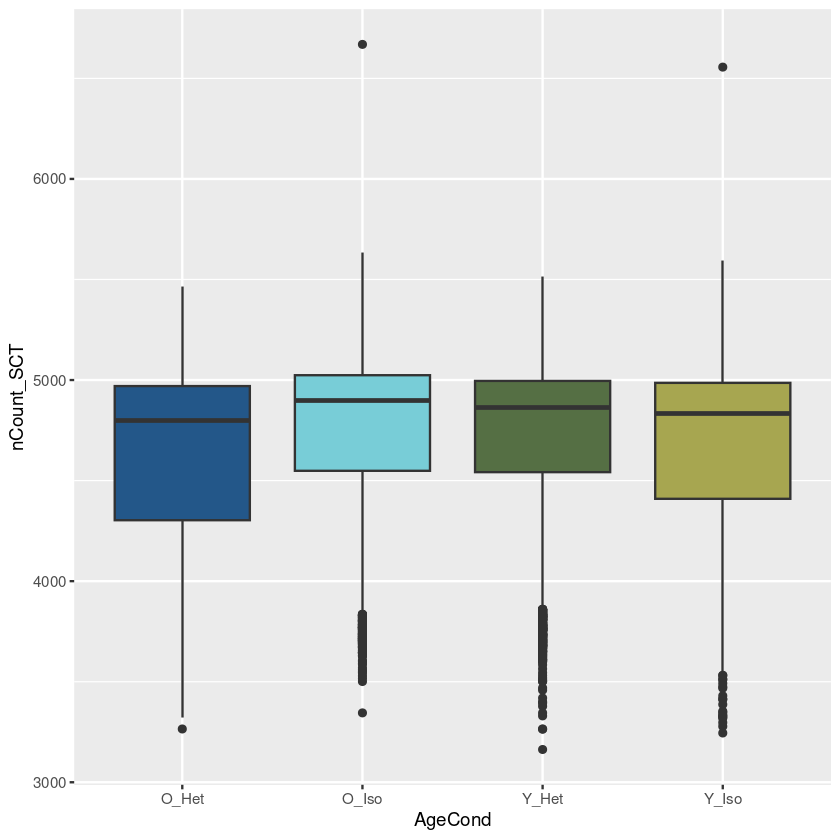

In [24]:
# Do the same thing as the cell before but with normalized RNA levels
plot <- ggplot(metadata, aes(x=AgeCond, y=nCount_SCT)) + 
  geom_boxplot(fill=c("#235789", "#78CDD7", "#556F44", "#A7A650"))
plot

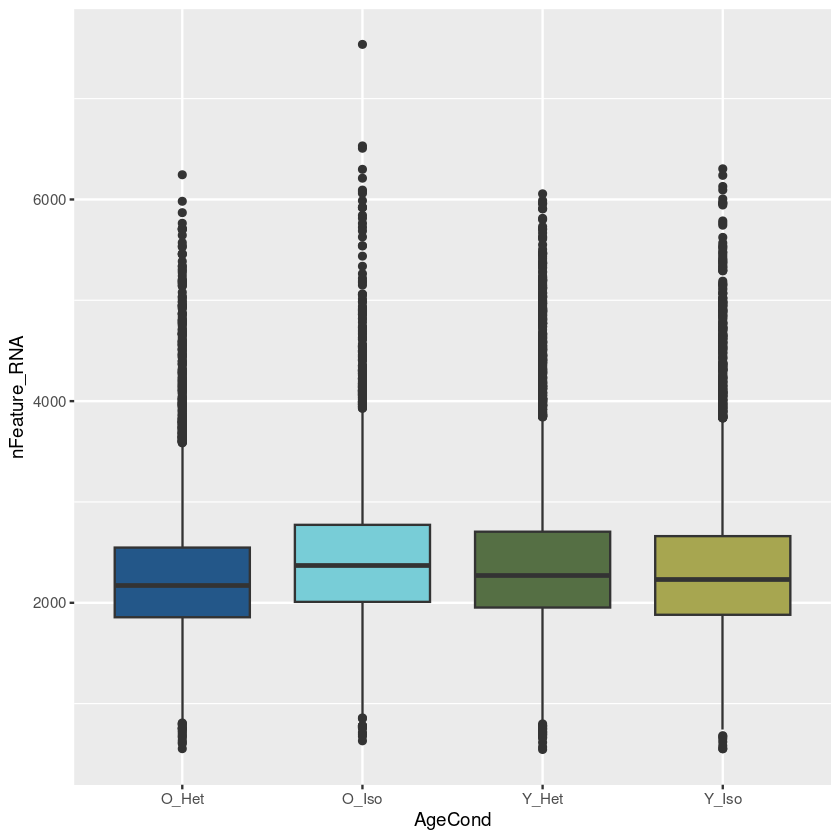

In [25]:
# Compare the amount of genes in a mouse across young/old and het/iso
plot <- ggplot(metadata, aes(x=AgeCond, y=nFeature_RNA)) + 
  geom_boxplot(fill=c("#235789", "#78CDD7", "#556F44", "#A7A650"))
plot

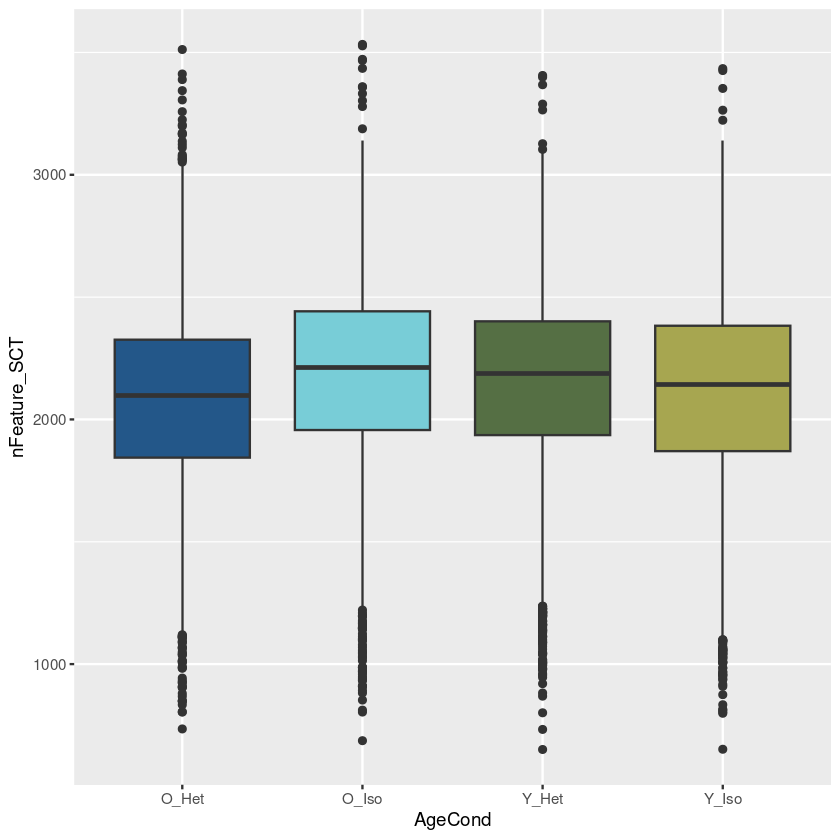

In [26]:
# Do the same thing as the cell before but with normalized RNA levels
plot <- ggplot(metadata, aes(x=AgeCond, y=nFeature_SCT)) + 
  geom_boxplot(fill=c("#235789", "#78CDD7", "#556F44", "#A7A650"))
plot

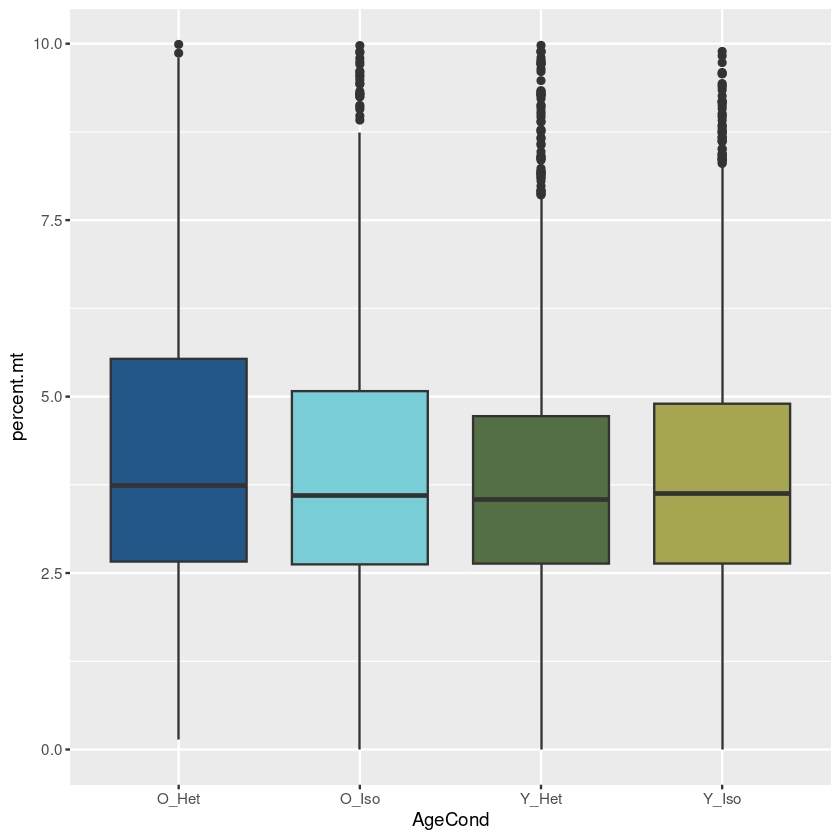

In [27]:
# Compare the percent of mitochondrial RNA in a mouse across young/old and het/iso
plot <- ggplot(metadata, aes(x=AgeCond, y=percent.mt)) + 
  geom_boxplot(fill=c("#235789", "#78CDD7", "#556F44", "#A7A650"))
plot

In [28]:
# Find transcriptional noise across all cell types + compare between groups
"Entire Dataset"
(metadata$nFeature_SCT %>% sd())/(metadata$nFeature_SCT %>% mean())

"Old Iso"

oldisonoise <- (oisodata$nFeature_SCT %>% sd())/(oisodata$nFeature_SCT %>% mean())
oldisonoise

"Young Iso"

youngisonoise <- (yisodata$nFeature_SCT %>% sd())/(yisodata$nFeature_SCT %>% mean())
youngisonoise

"Old Het"

oldhetnoise <- (ohetdata$nFeature_SCT %>% sd())/(ohetdata$nFeature_SCT %>% mean())
oldhetnoise

"Young Het"

younghetnoise <- (yhetdata$nFeature_SCT %>% sd())/(yhetdata$nFeature_SCT %>% mean())
younghetnoise

# Create barplot
barplot(main="Transcriptional Noise Across Age Groups \n and Isochronic/Heterochronic Parabiosis",height=c(oldisonoise, youngisonoise, oldisonoise, youngisonoise), 
        names=c("Old Iso", "Young Iso", "Old Het", "Young Het"),
        col = c("#78CDD7", "#A7A650", "#235789", "#556F44"))


[1] "Entire Dataset"

[1] 0.181906

[1] "Old Iso"

[1] 0.1781434

[1] "Young Iso"

[1] 0.1853837

[1] "Old Het"

[1] 0.1869484

[1] "Young Het"

[1] 0.1745756

In [29]:
# Look at differences in transcriptional noise in different cell types + see how they change with age

Processing cell type: Microglia 
            Condition     Noise
1      Old Isochronic 0.1337521
2    Young Isochronic 0.1556874
3   Old Heterochronic 0.1560427
4 Young Heterochronic 0.1414609
Processing cell type: Astrocyte_qNSC 
            Condition     Noise
1      Old Isochronic 0.2271638
2    Young Isochronic 0.2178294
3   Old Heterochronic 0.2158312
4 Young Heterochronic 0.2179344


Processing cell type: Endothelial 
            Condition     Noise
1      Old Isochronic 0.2256017
2    Young Isochronic 0.2377087
3   Old Heterochronic 0.2343100
4 Young Heterochronic 0.1965464


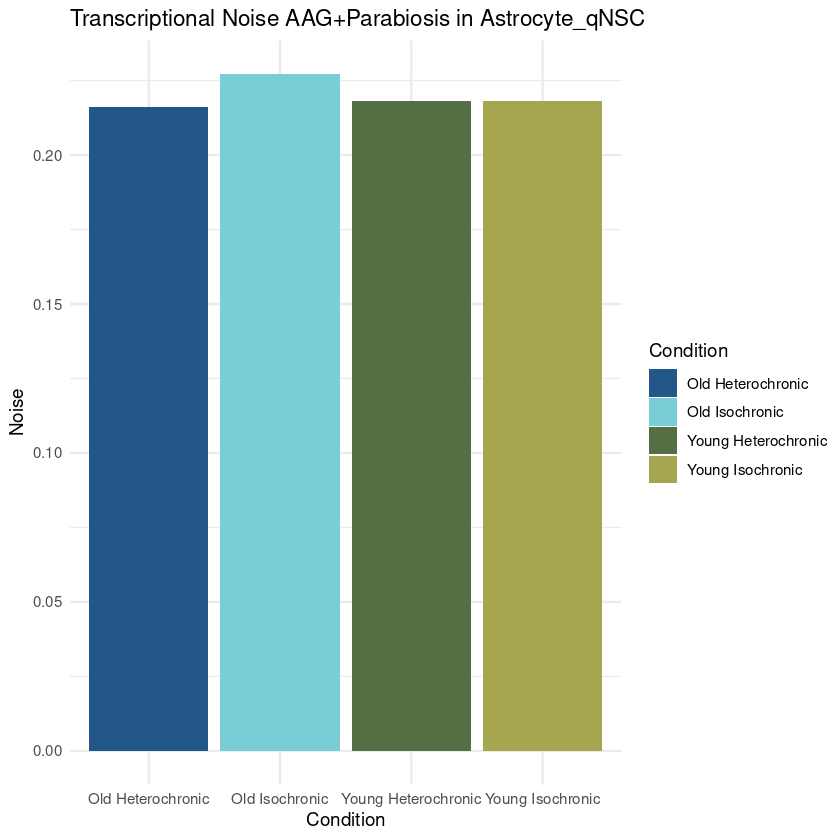

Processing cell type: Neuroblast 
            Condition     Noise
1      Old Isochronic 0.1978127
2    Young Isochronic 0.2058658
3   Old Heterochronic 0.1929656
4 Young Heterochronic 0.1956540


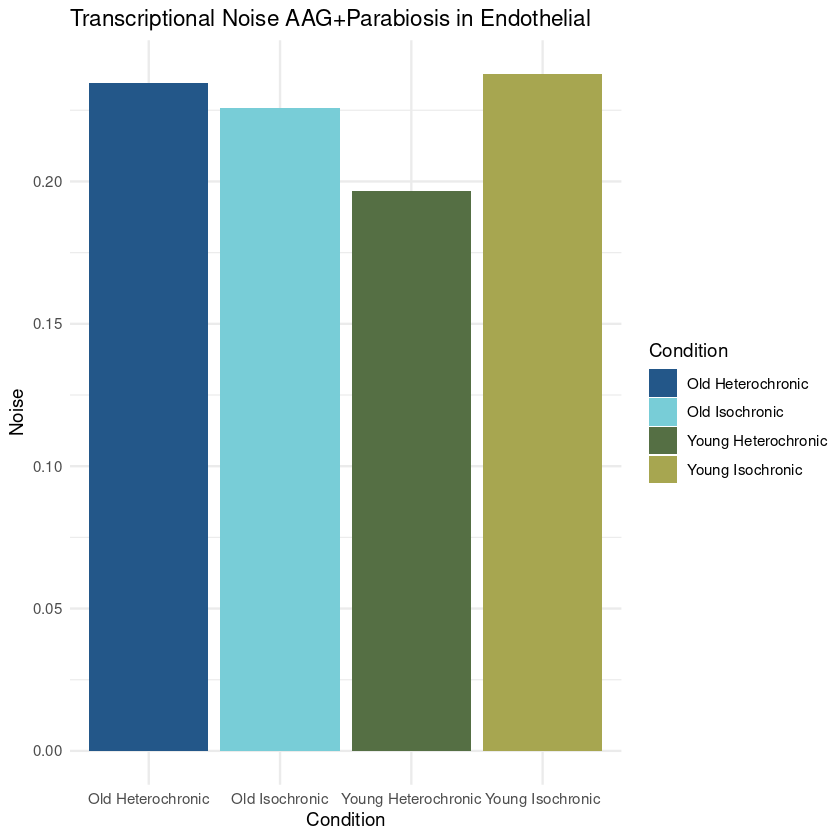

Processing cell type: Oligodendro 
            Condition     Noise
1      Old Isochronic 0.1179687
2    Young Isochronic 0.1096005
3   Old Heterochronic 0.1257727
4 Young Heterochronic 0.1101160


Processing cell type: aNSC_NPC 
            Condition     Noise
1      Old Isochronic 0.1016693
2    Young Isochronic 0.1133816
3   Old Heterochronic 0.1157868
4 Young Heterochronic 0.1107780


Processing cell type: Mural 
            Condition     Noise
1      Old Isochronic 0.2237372
2    Young Isochronic 0.2620275
3   Old Heterochronic 0.2474379
4 Young Heterochronic 0.2310663


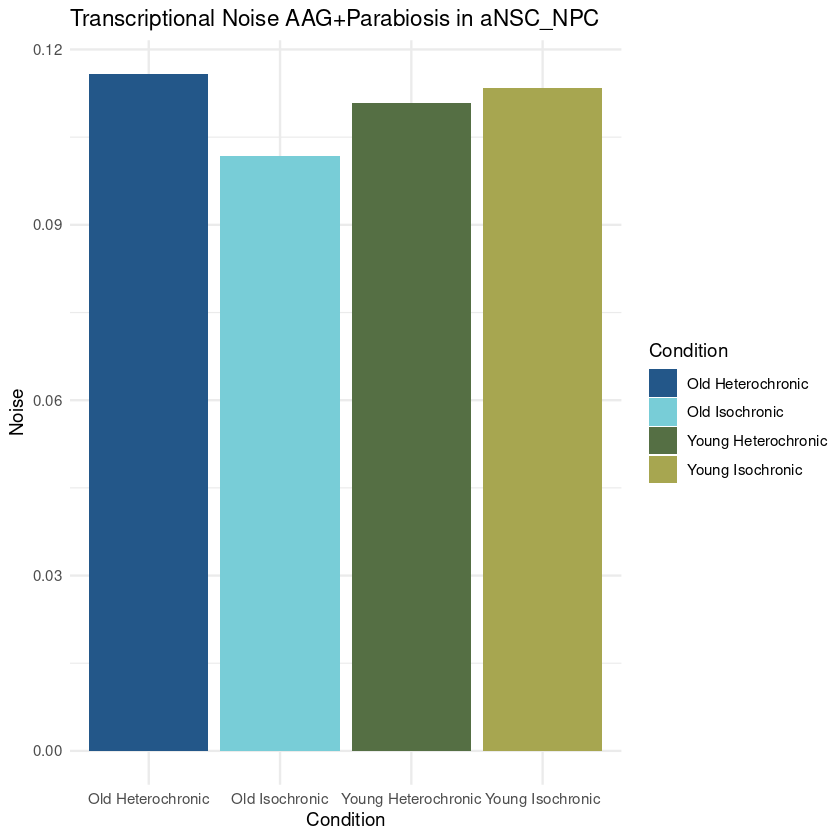

Processing cell type: OPC 
            Condition     Noise
1      Old Isochronic 0.2477939
2    Young Isochronic 0.1652419
3   Old Heterochronic 0.1154350
4 Young Heterochronic 0.2080503


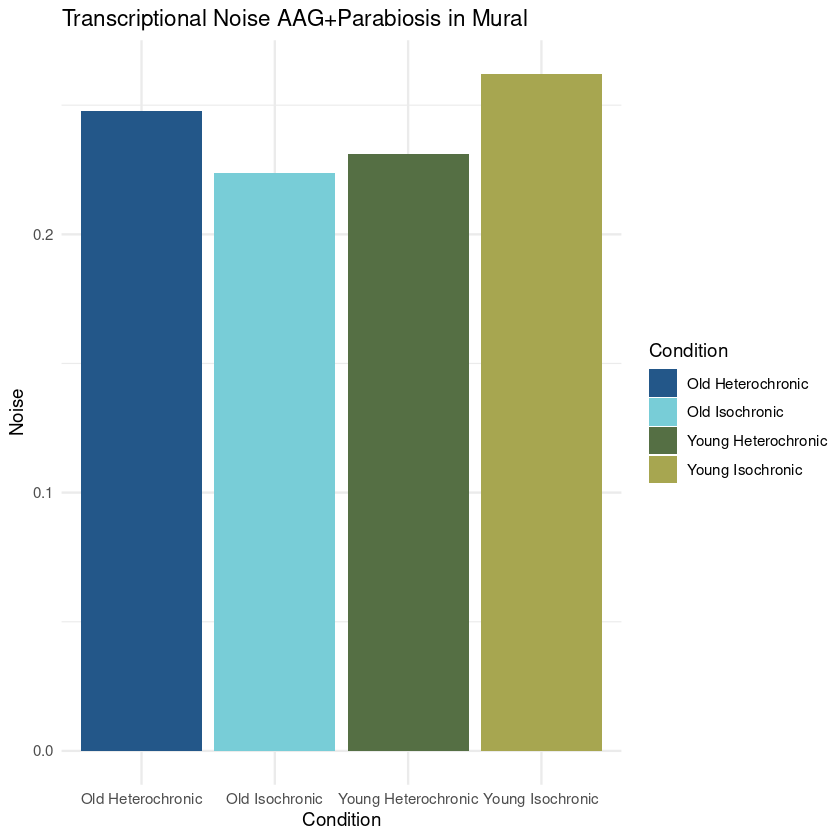

Processing cell type: Macrophage 
            Condition Noise
1      Old Isochronic    NA
2    Young Isochronic    NA
3   Old Heterochronic    NA
4 Young Heterochronic    NA


Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


Processing cell type: T_Cell 
            Condition Noise
1      Old Isochronic    NA
2    Young Isochronic    NA
3   Old Heterochronic    NA
4 Young Heterochronic    NA


Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


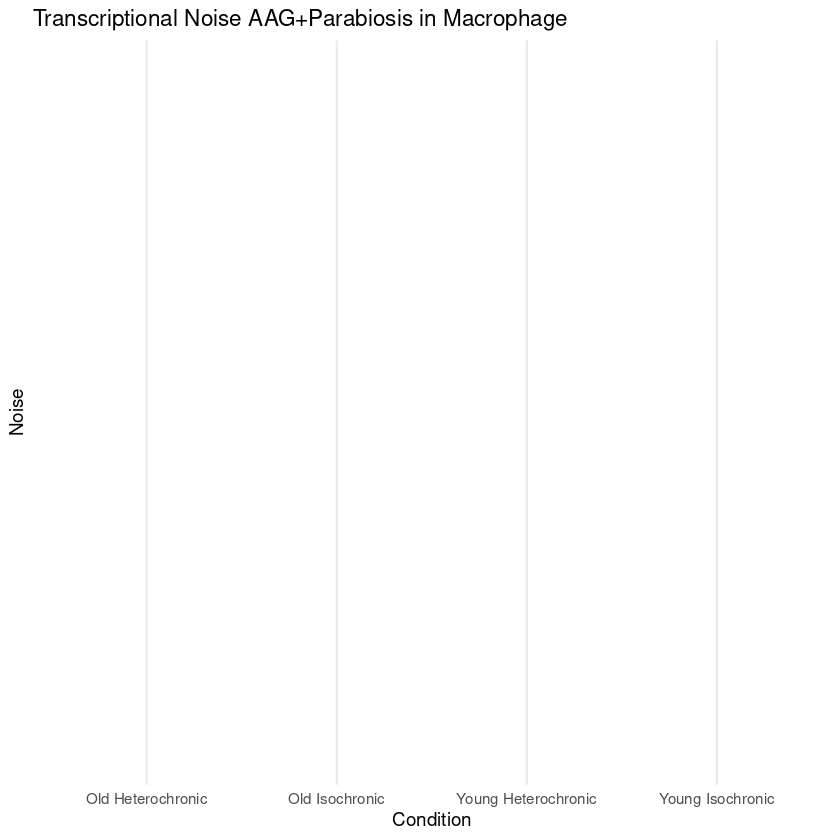

Processing cell type: Epithelial 
            Condition Noise
1      Old Isochronic    NA
2    Young Isochronic    NA
3   Old Heterochronic    NA
4 Young Heterochronic    NA


Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


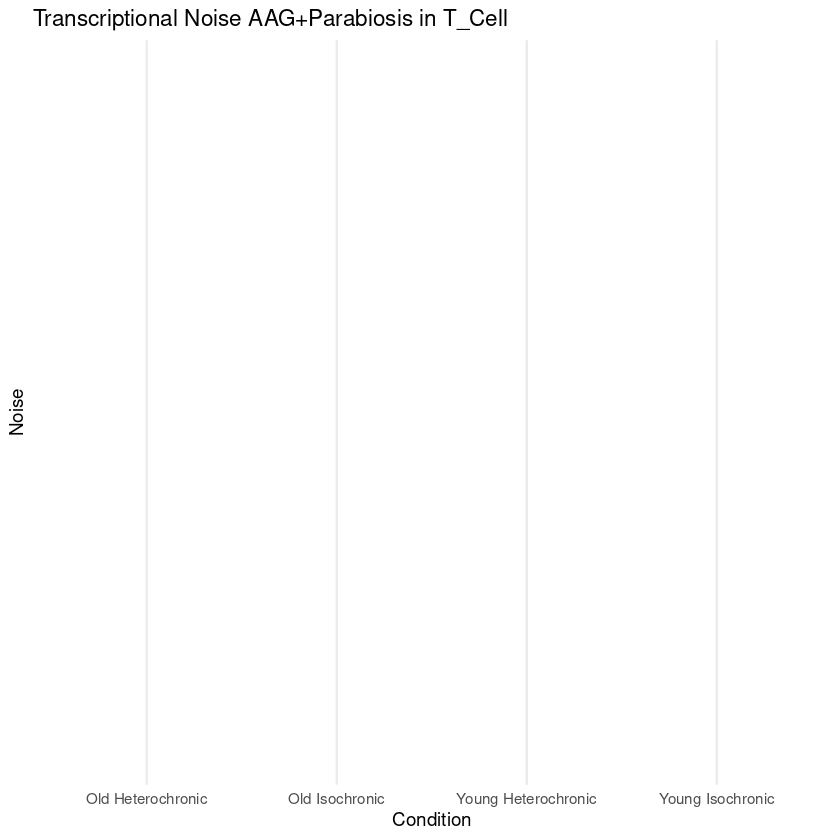

Processing cell type: Neuronal 
            Condition Noise
1      Old Isochronic    NA
2    Young Isochronic    NA
3   Old Heterochronic    NA
4 Young Heterochronic    NA


Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


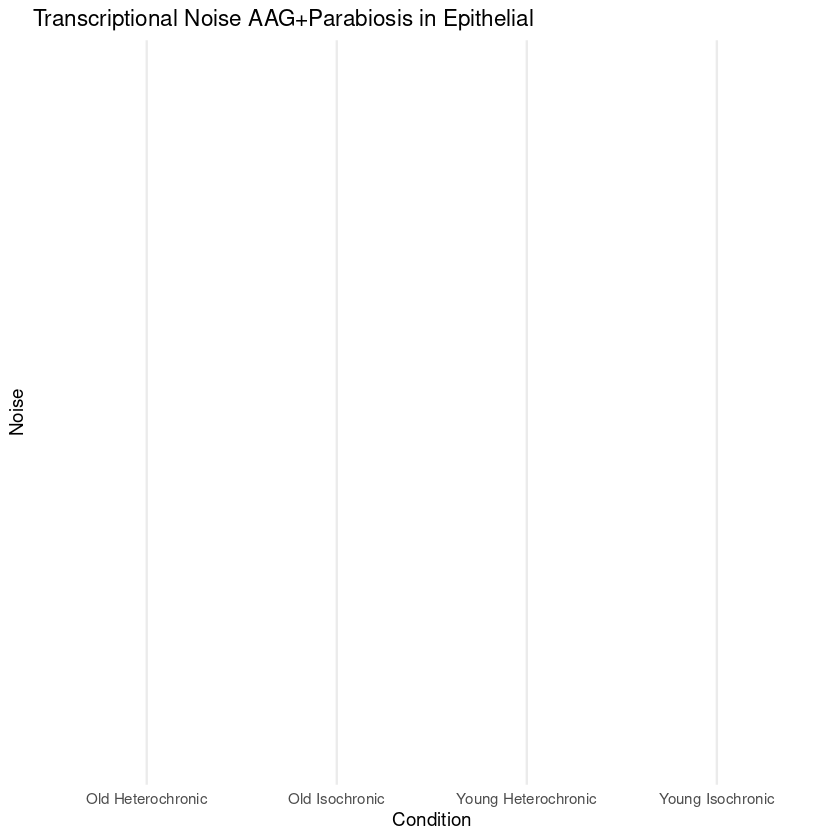

Processing cell type: Vascular_Leptomeningeal 
            Condition Noise
1      Old Isochronic    NA
2    Young Isochronic    NA
3   Old Heterochronic    NA
4 Young Heterochronic    NA


Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 4 rows containing missing values (`position_stack()`).”


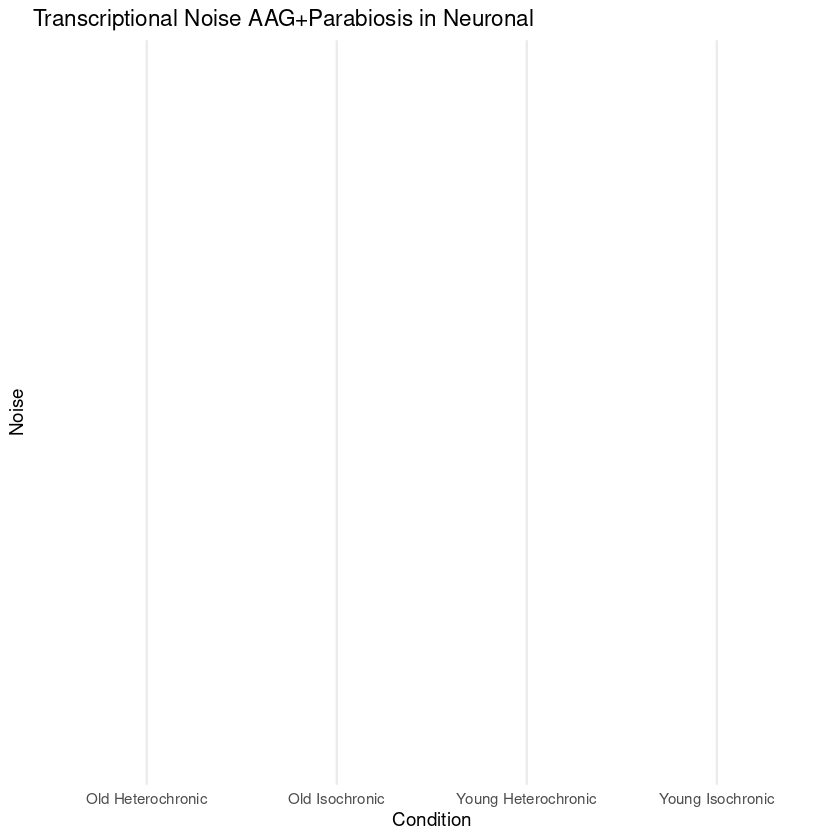

Processing cell type: Ependymal 
            Condition     Noise
1      Old Isochronic        NA
2    Young Isochronic 0.1430218
3   Old Heterochronic        NA
4 Young Heterochronic 0.1035492


Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”


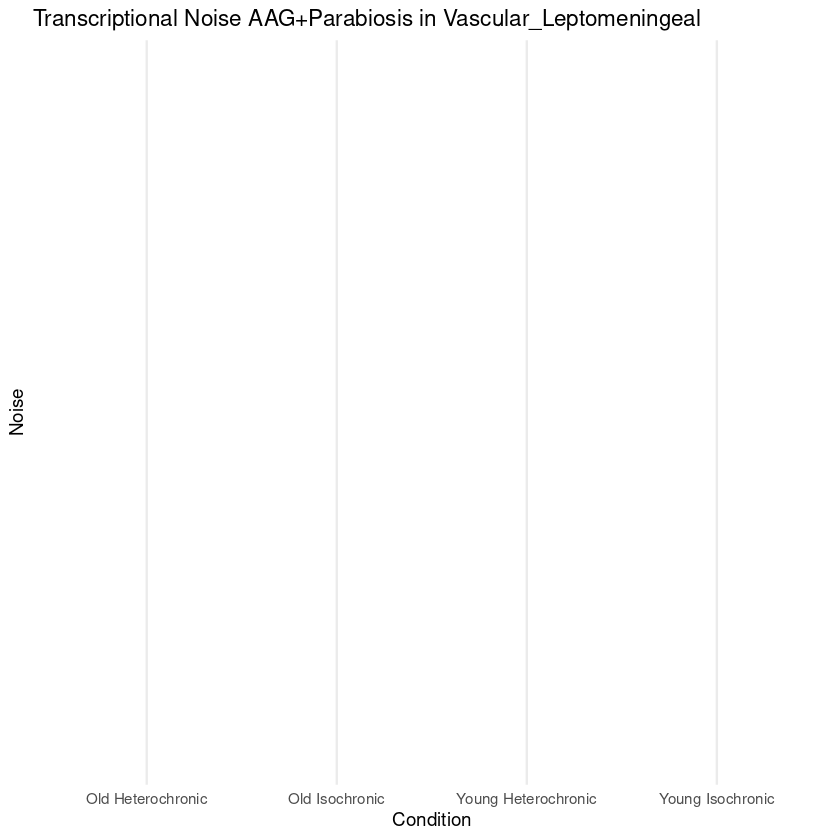

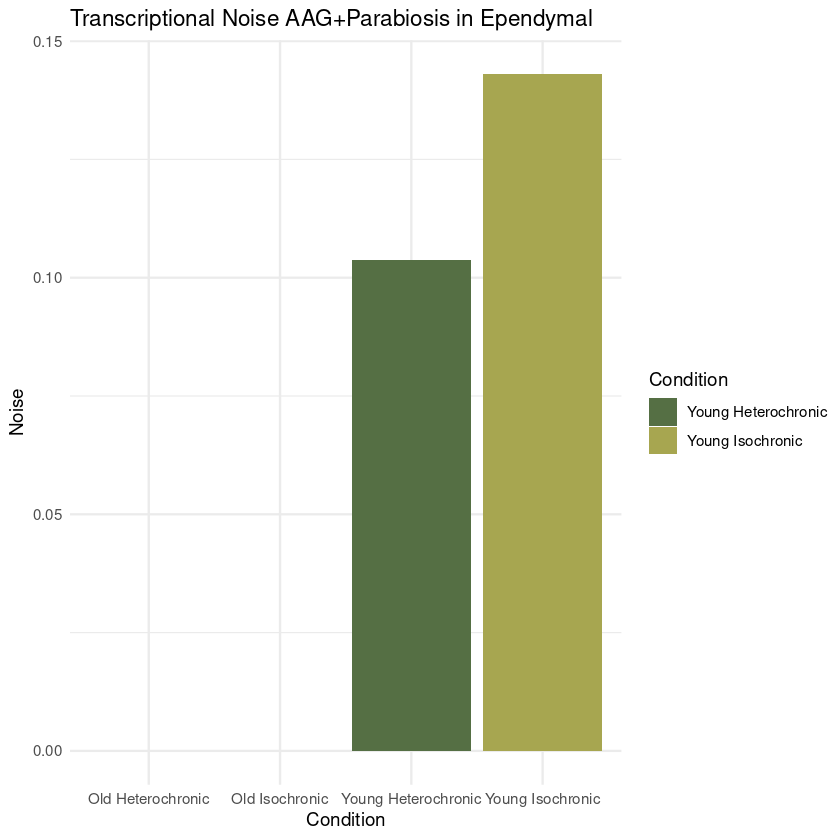

In [30]:
# Look at specific cells

celltypenames <- c("Microglia", "Astrocyte_qNSC", "Endothelial", "Neuroblast", "Oligodendro", "aNSC_NPC", "Mural", "OPC", "Macrophage",
                   "T_Cell", "Epithelial", "Neuronal", "Vascular_Leptomeningeal", "Ependymal")

for (x in celltypenames) {
    cat("Processing cell type:", x, "\n")
    
    dataOI <- oisodata %>% filter(Celltype==x)
    dataYI <- yisodata %>% filter(Celltype==x)
    dataOH <- ohetdata %>% filter(Celltype==x)
    dataYH <- yhetdata %>% filter(Celltype==x)
    
    noise <- c((dataOI$nFeature_SCT %>% sd())/(dataOI$nFeature_SCT %>% mean()),
                        (dataYI$nFeature_SCT %>% sd())/(dataYI$nFeature_SCT %>% mean()),
                        (dataOH$nFeature_SCT %>% sd())/(dataOH$nFeature_SCT %>% mean()),
                        (dataYH$nFeature_SCT %>% sd())/(dataYH$nFeature_SCT %>% mean()))

    noise <- data.frame(
        Condition = c("Old Isochronic", "Young Isochronic", "Old Heterochronic", "Young Heterochronic"),
        Noise = noise
    )

    print(noise)
    
    barplot <- ggplot(noise, aes(x=Condition, y=Noise, fill=Condition)) +
        geom_bar(stat="identity") +
        labs(title=paste("Transcriptional Noise AAG+Parabiosis in", x), y="Noise") +
        theme_minimal() +
        scale_fill_manual(values=c("Old Isochronic"="#78CDD7", "Young Isochronic"="#A7A650", "Old Heterochronic"="#235789", "Young Heterochronic"="#556F44"))
    
    print(barplot)
    ggsave(paste0("figures/transcriptional_noise/TranscriptionalNoise_", x, ".png"), barplot, width=10, height=6)

    #print(x)
    #ggsave("TranscriptionalNoise.png", barplot, width = 10, height = 10)
    #ggsave(paste(x, "TranscriptionalNoise.png"), plot = barplot)

}

In [31]:
data <- subset(data, subset = hash.ID != "NA")

In [32]:
data@meta.data <- data@meta.data %>%
  mutate(ID = sub("-.*", "", hash.ID))

In [33]:
seurat_list <- SplitObject(data, split.by = 'ID')

In [34]:
length(seurat_list)

[1] 18

In [35]:
lapply(seurat_list, function(x) head(x@meta.data))

$BC2
                        orig.ident nCount_RNA nFeature_RNA percent.mt
20_AAACCCATCGGTAGGA-1_1       GEX1       5461         2259  3.9186962
20_AAACGCTTCGCAGTCG-1_1       GEX1       5762         2182  5.9007289
20_AAAGGATAGGAAACGA-1_1       GEX1      12454         3794  4.0308335
20_AAATGGATCACAATGC-1_1       GEX1       6266         2143  2.0108522
20_AACCAACTCTCCTGTG-1_1       GEX1       3006         1403  0.7984032
20_AACCACAAGCATGCAG-1_1       GEX1      14970         3999  5.6112224
                        RNA_snn_res.0.15 seurat_clusters RNA_snn_res.0.25
20_AAACCCATCGGTAGGA-1_1                3               3                3
20_AAACGCTTCGCAGTCG-1_1                1               4                1
20_AAAGGATAGGAAACGA-1_1                4               9                5
20_AAATGGATCACAATGC-1_1                0               1                0
20_AACCAACTCTCCTGTG-1_1                0               8                0
20_AACCACAAGCATGCAG-1_1                1               4                1
                        RNA_snn_res.0.5                               LMO_maxID
20_AAACCCATCGGTAGGA-1_1               3 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAACGCTTCGCAGTCG-1_1               1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAAGGATAGGAAACGA-1_1               5 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAATGGATCACAATGC-1_1               0 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCAACTCTCCTGTG-1_1               0 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCACAAGCATGCAG-1_1               1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
                                                  LMO_secondID LMO_margin
20_AAACCCATCGGTAGGA-1_1 BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG  1.2414789
20_AAACGCTTCGCAGTCG-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  0.7782146
20_AAAGGATAGGAAACGA-1_1 BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG  1.1531051
20_AAATGGATCACAATGC-1_1 BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC  1.1338923
20_AACCAACTCTCCTGTG-1_1 BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT  0.2072615
20_AACCACAAGCATGCAG-1_1 BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG  1.8950192
                                             LMO_classification
20_AAACCCATCGGTAGGA-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAACGCTTCGCAGTCG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAAGGATAGGAAACGA-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AAATGGATCACAATGC-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCAACTCTCCTGTG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
20_AACCACAAGCATGCAG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC
                        LMO_classification.global
20_AAACCCATCGGTAGGA-1_1                   Singlet
20_AAACGCTTCGCAGTCG-1_1                   Singlet
20_AAAGGATAGGAAACGA-1_1                   Singlet
20_AAATGGATCACAATGC-1_1                   Singlet
20_AACCAACTCTCCTGTG-1_1                   Singlet
20_AACCACAAGCATGCAG-1_1                   Singlet
                                                        hash.ID nCount_SCT
20_AAACCCATCGGTAGGA-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       4888
20_AAACGCTTCGCAGTCG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       4884
20_AAAGGATAGGAAACGA-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       4944
20_AAATGGATCACAATGC-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       4933
20_AACCAACTCTCCTGTG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       3795
20_AACCACAAGCATGCAG-1_1 BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC       4514
                        nFeature_SCT SCT_snn_res.0.25 SCT_snn_res.0.2 Barcode
20_AAACCCATCGGTAGGA-1_1         2258                2               2     BC2
20_AAACGCTTCGCAGTCG-1_1         2182                1               1     BC2
20_AAAGGATAGGAAACGA-1_1         2401                5               6     BC2
20_AAATGGATCACAATGC-1_1         2135                0               0     BC2
20_AACCAACTCTCCTGTG-1_1         1403                0               0     BC2
20_AACCACAAGCATGCAG-1_1         1998                1               1     BC2
                          Age Type Month

In [36]:
initial_matrices <- lapply(seurat_list, function(x) GetAssayData(x, slot = "data"))

In [34]:
initial_matrices[[1]]

  [[ suppressing 32 column names ‘20_AAACCCATCGGTAGGA-1_1’, ‘20_AAACGCTTCGCAGTCG-1_1’, ‘20_AAAGGATAGGAAACGA-1_1’ ... ]]

  [[ suppressing 32 column names ‘20_AAACCCATCGGTAGGA-1_1’, ‘20_AAACGCTTCGCAGTCG-1_1’, ‘20_AAAGGATAGGAAACGA-1_1’ ... ]]

  [[ suppressing 32 column names ‘20_AAACCCATCGGTAGGA-1_1’, ‘20_AAACGCTTCGCAGTCG-1_1’, ‘20_AAAGGATAGGAAACGA-1_1’ ... ]]



19103 x 428 sparse Matrix of class "dgCMatrix"
                                                                                   
Xkr4          .         .         .         .         .         .         .        
Rp1           .         .         .         .         .         .         .        
Sox17         .         .         .         .         .         .         .        
Mrpl15        .         0.6931472 .         .         0.6931472 .         .        
Lypla1        .         .         .         .         .         .         .        
Gm37988       .         .         .         .         .         .         .        
Tcea1         0.6931472 0.6931472 0.6931472 0.6931472 1.3862944 0.6931472 0.6931472
Rgs20         1.0986123 .         .         .         .         .         0.6931472
Gm16041       .         .         .         .         .         .         0.6931472
Atp6v1h       1.0986123 0.6931472 0.6931472 0.6931472 .         .         .        
Oprk1         .         .    

In [40]:
# Find transcriptional noise across all individuals and compare
noiselist <- c();

hashidlist <- c('BC2-Young-Het-5.10-1B-B1-14300-TCAATGGC', 'BC3-Old-Iso-20.50-6A-B1-35260-CTCTAGAC', 
            'BC4-Old-Iso-20.50-6B-B1-16224-ACCAATGC', 'BC6-Old-Iso-20.50-9B-B1-29863-CGAACAAG', 
            'BC1-Old-Het-20.50-1A-B1-25000-TGTGATGG', 'BC5-Old-Iso-20.50-9A-B1-24388-AGTTGCGT',
            'BC7-Old-Het-20.53-2A-B2-51000-GTACCTGT', 'BC13-Old-Het-20.53-5A-B2-50000-CAGTTAGG',
            'BC11-Young-Iso-5.67-10A-B2-70700-GAGTCGAT', 'BC9-Old-Iso-20.53-7A-B2-33700-AAGTACGC',
            'BC12-Young-Iso-5.67-10B-B2-70100-AAGGCTAG', 'BC8-Young-Het-5.13-2B-B2-30500-GAAGCTTG',
            'BC14-Young-Het-5.13-5B-B2-50100-AACCGAAC', 'BC10-Old-Iso-20.53-7B-B2-21000-ATTCGCAC',
            'BC23-Young-Iso-4.60-15A-B4-28000-ATCTACGG', 'BC22-Young-Het-5.40-14B-B4-38000-CGATTAGC',
            'BC21-Old-Het-20.80-14A-B4-24000-GAGAGACT', 'BC24-Young-Iso-4.60-15B-B4-22800-TGTACCAG');

idlist <- c('BC2', 'BC3', 
            'BC4', 'BC6', 
            'BC1', 'BC5',
            'BC7', 'BC13',
            'BC11', 'BC9',
            'BC12', 'BC8',
            'BC14', 'BC10',
            'BC23', 'BC22',
            'BC21', 'BC24');

experimentalgroup <- c("young het", "old iso", "old iso", "old iso", "old het", "old iso", "old het", "old het", "young iso", 
                       "old iso", "young iso", "young het", "young het", "old iso", "young iso", "young het", "old het", "young iso");

cols <- c("#556F44", "#78CDD7", "#78CDD7", "#78CDD7", "#235789", "#78CDD7", "#235789", "#235789", "#A7A650", 
                       "#78CDD7", "#A7A650", "#556F44", "#556F44", "#78CDD7", "#A7A650", "#556F44", "#235789", "#A7A650");

for (x in 1:length(idlist)) {
    noise <- (seurat_list[[x]]$nCount_SCT %>% sd())/(seurat_list[[x]]$nCount_SCT %>% mean())
    noiselist <- c(noiselist, noise)
}

In [42]:
noiselist

[1] 0.08399931 0.09027593 0.07685333 0.07953543 0.10328672 0.08378445
 [7] 0.10056761 0.09404292 0.10479257 0.09862981 0.10011957 0.09372288
[13] 0.08795588 0.11037571 0.09043571 0.08977348 0.08996787 0.09100065

In [49]:
png(filename = "figures/transcriptionalnoise_allcells.png", width = 2000, height = 1000, res = 150)

plot <- barplot(main=paste("Transcriptional Noise AAG+Parabiosis across Cell IDs"),
        height=noiselist, 
        ylim = c(0, round(max(noiselist), 2)),
        names = idlist,
        col = cols)

dev.off()

png 
  2

In [45]:
calculateNoise <- function(gene){
sd(gene)/mean(gene)
}

In [46]:
# For each matrix in initial_matrices, go row by row (gene by gene) and calculate noise for that gene
noiseDistributions <- lapply(initial_matrices, function(matrix) {
apply(matrix, MARGIN = 2, FUN = calculateNoise)
})

In [47]:
# Convect noiseDistributions to a dataframe again
noiseDistributions_asDF <- do.call(rbind, lapply(seq_along(noiseDistributions), function(i) {
  data.frame(ID = names(noiseDistributions)[i], Value = noiseDistributions[[i]])
}))

In [83]:
head(noiseDistributions_asDF)

ID  Value   
20_AAACCCATCGGTAGGA-1_1 BC2 3.076132
20_AAACGCTTCGCAGTCG-1_1 BC2 3.149995
20_AAAGGATAGGAAACGA-1_1 BC2 2.995256
20_AAATGGATCACAATGC-1_1 BC2 3.241494
20_AACCAACTCTCCTGTG-1_1 BC2 4.094403
20_AACCACAAGCATGCAG-1_1 BC2 3.335202

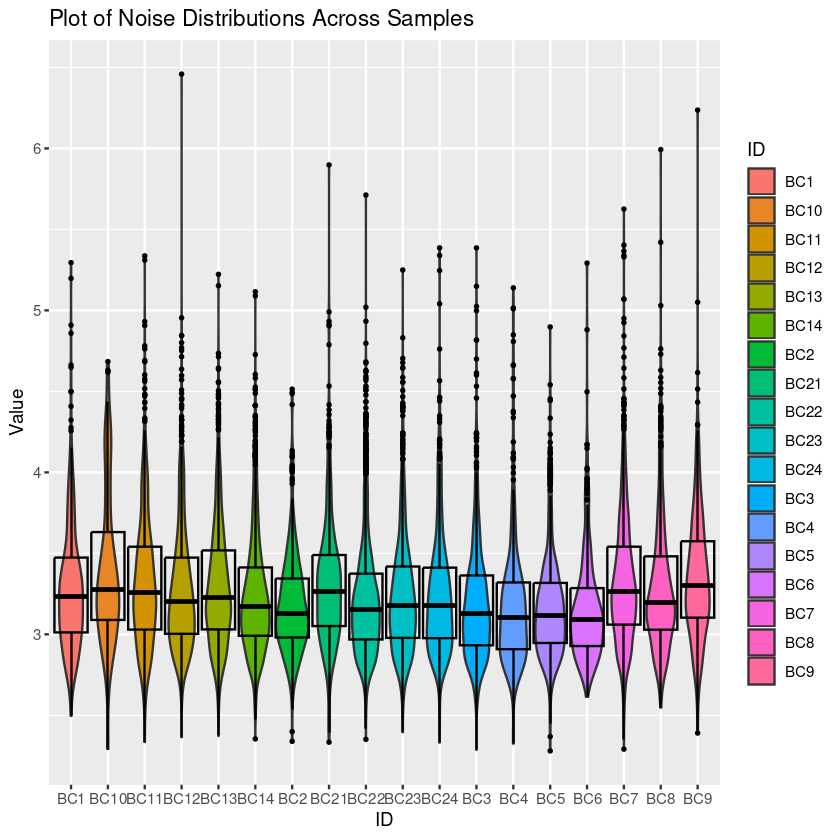

In [84]:
ggplot(noiseDistributions_asDF, aes(x = ID, y = Value, fill=ID)) +
  geom_violin() +
  geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
  labs(title = "Plot of Noise Distributions Across Samples",
       x = "ID",
       y = "Value")

In [48]:
plot <- ggplot(noiseDistributions_asDF, aes(x = ID, y = Value, fill=ID)) +
  geom_violin() +
  geom_boxplot(width = 0.9, color = "black", fill="NA", outlier.size = 0.5, position = position_dodge(0.75)) +
  labs(title = "Plot of Noise Distributions Across Samples",
       x = "ID",
       y = "Value") +
  scale_fill_manual(values = cols)

ggsave(paste0("figures/transcriptionalnoisedistribution_allcells.png"), plot, width = 17, height = 10)

In [86]:
head(noiseDistributions_asDF)

ID  Value   
20_AAACCCATCGGTAGGA-1_1 BC2 3.076132
20_AAACGCTTCGCAGTCG-1_1 BC2 3.149995
20_AAAGGATAGGAAACGA-1_1 BC2 2.995256
20_AAATGGATCACAATGC-1_1 BC2 3.241494
20_AACCAACTCTCCTGTG-1_1 BC2 4.094403
20_AACCACAAGCATGCAG-1_1 BC2 3.335202

In [22]:
medians <- noiseDistributions_asDF %>%
  group_by(ID) %>%
  summarize(MedianValue = median(Value, na.rm = TRUE))
medians

ID   MedianValue
1  BC1  3.234427   
2  BC10 3.277864   
3  BC11 3.255911   
4  BC12 3.204199   
5  BC13 3.229412   
6  BC14 3.173003   
7  BC2  3.129944   
8  BC21 3.262629   
9  BC22 3.152871   
10 BC23 3.177993   
11 BC24 3.177374   
12 BC3  3.128533   
13 BC4  3.106666   
14 BC5  3.114005   
15 BC6  3.090674   
16 BC7  3.262603   
17 BC8  3.193850   
18 BC9  3.300561

In [23]:
medians <- medians %>%
  mutate(ExperimentalGroup = experimentalgroup)

In [90]:
head(medians)

ID   MedianValue ExperimentalGroup
1 BC1  3.234427    young het        
2 BC10 3.277864    old iso          
3 BC11 3.255911    old iso          
4 BC12 3.204199    old iso          
5 BC13 3.229412    old het          
6 BC14 3.173003    old iso

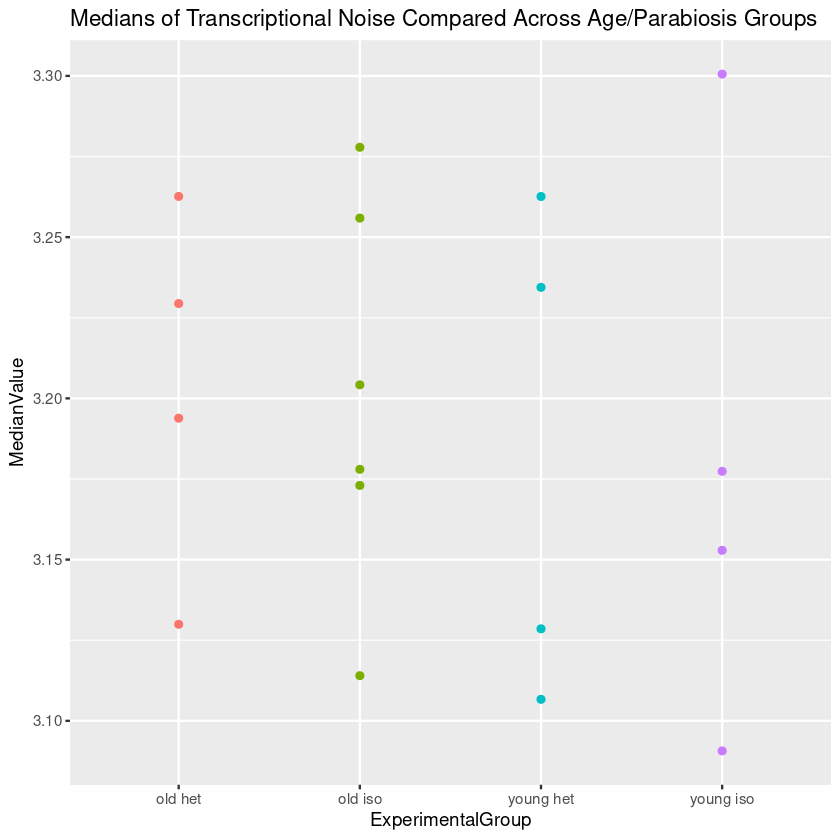

In [92]:
ggplot(medians) +
    geom_point(aes(x = ExperimentalGroup, y = MedianValue, color = ExperimentalGroup)) +
    labs(title = "Medians of Transcriptional Noise Compared Across Age/Parabiosis Groups") +
    theme(legend.position = "none")

In [24]:
idstoname <- function(ids) {
    ids <- unlist(strsplit(ids, "/"))
    genenames <- mapIds(org.Mm.eg.db, keys = ids, column = "SYMBOL", keytype = "ENTREZID", multiVals = "first")
    paste(genenames, collapse = "/")
}

In [25]:
library(ggrepel)
library(clusterProfiler)
library(org.Mm.eg.db)
library(GOSemSim)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

clusterProfiler v4.2.1  Fo

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' ret

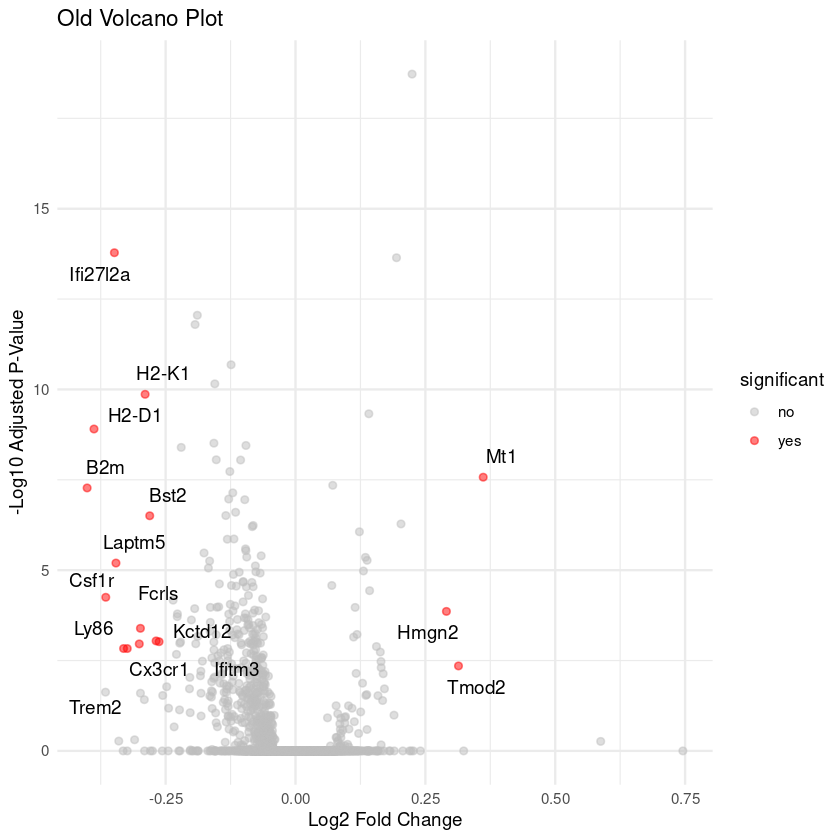

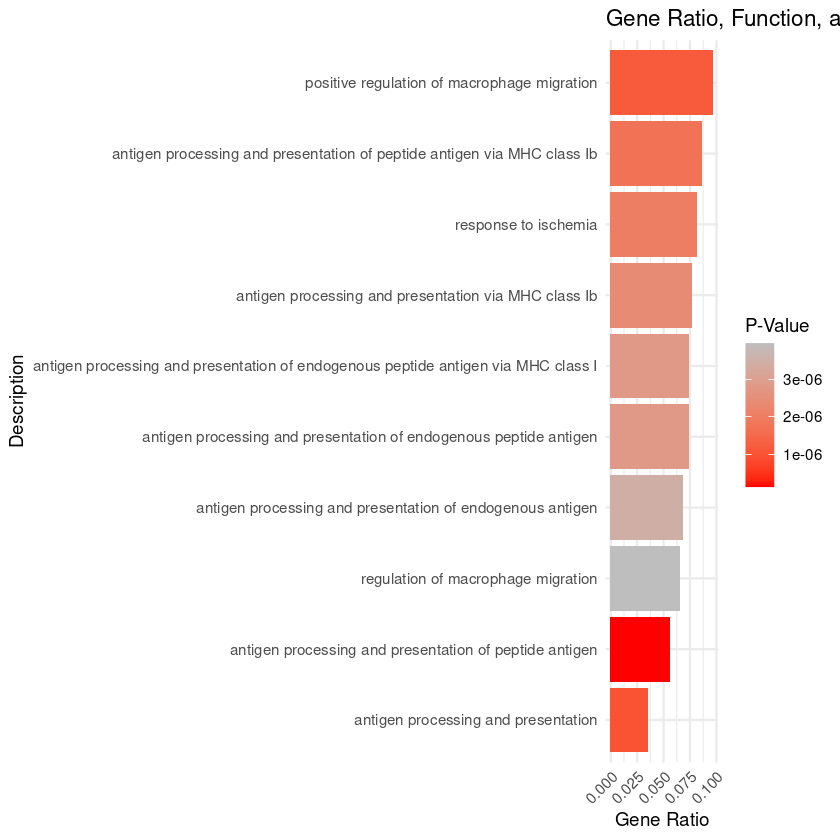

In [28]:
isoid <- c('BC3', 'BC4', 'BC6', 'BC5', 'BC9', 'BC10')
hetid <- c('BC1', 'BC7', 'BC13', 'BC21')
isoname <- "OldIso"
hetname <- "OldHet"
prefix <- "Old"


metadata$group <- ifelse(metadata$ID %in% isoid, isoname, 
                     ifelse(metadata$ID %in% hetid, hetname, NA))
data@meta.data <- metadata

de_results <- FindMarkers(data, ident.1 = hetname, ident.2 = isoname, group.by = "group", logfc.threshold = 0)
de_results <- de_results %>%
                mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))

significantdata <- de_results %>% filter(significant == "yes")

significantgenes <- rownames(significantdata)

volcano_plot <- ggplot(de_results, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
                geom_point(aes(color = significant), alpha = 0.5) +
                scale_color_manual(values = c("no" = "grey", "yes" = "red")) +
                theme_minimal() +
                labs(title = paste(prefix, "Volcano Plot"), x = "Log2 Fold Change", y = "-Log10 Adjusted P-Value") +
                geom_text_repel(data = de_results[de_results$significant == 'yes',], aes(label = significantgenes), 
                          max.overlaps = 200, box.padding = 0.5, force = 1, segment.color = NA)


ggsave(paste0("figures/gene_ontology/", prefix, "VolcanoPlot.png"), volcano_plot, width = 10, height = 10)
volcano_plot

geneIDs <- list(select(org.Mm.eg.db, keys = significantgenes, columns = c("ENTREZID"), keytype = "SYMBOL")$ENTREZID)

geneIDs <- as.numeric(as.character(unlist(geneIDs[[1]])))

ego <- enrichGO(gene = geneIDs,
            OrgDb = org.Mm.eg.db,
            keyType = "ENTREZID",
            ont = "BP",
            pAdjustMethod = "BH",
            pvalueCutoff = 0.05,
            qvalueCutoff = 0.05)

egowithgenenames <- as.data.frame(ego) %>%
rowwise() %>%
mutate(gene_names = idstoname(geneID))

egowithgenenames <- ungroup(egowithgenenames)

egowithgenenames <- egowithgenenames %>%
  mutate(TermCoverage = as.numeric(str_extract(GeneRatio, "^[0-9]+"))/as.numeric(str_extract(BgRatio, "^[0-9]+")))

bottom10pvalues <- egowithgenenames[order(egowithgenenames$pvalue),][1:10,]

plot <- ggplot(bottom10pvalues,
           aes(x = fct_reorder(Description, TermCoverage), y = TermCoverage, fill = pvalue)) +
        geom_bar(stat = "identity") +
        scale_fill_gradient(low = "red", high = "grey") +
        labs(title = "Gene Ratio, Function, and P-Value",
             x = "Description",
             y = "Gene Ratio",
             fill = "P-Value") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot <- plot + coord_flip()

# Save the plot with adjusted dimensions
ggsave(paste0("figures/gene_ontology/", prefix, "GeneRatio_plot_pvalue.png"), plot, width = 15, height = 6)

plot

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' ret

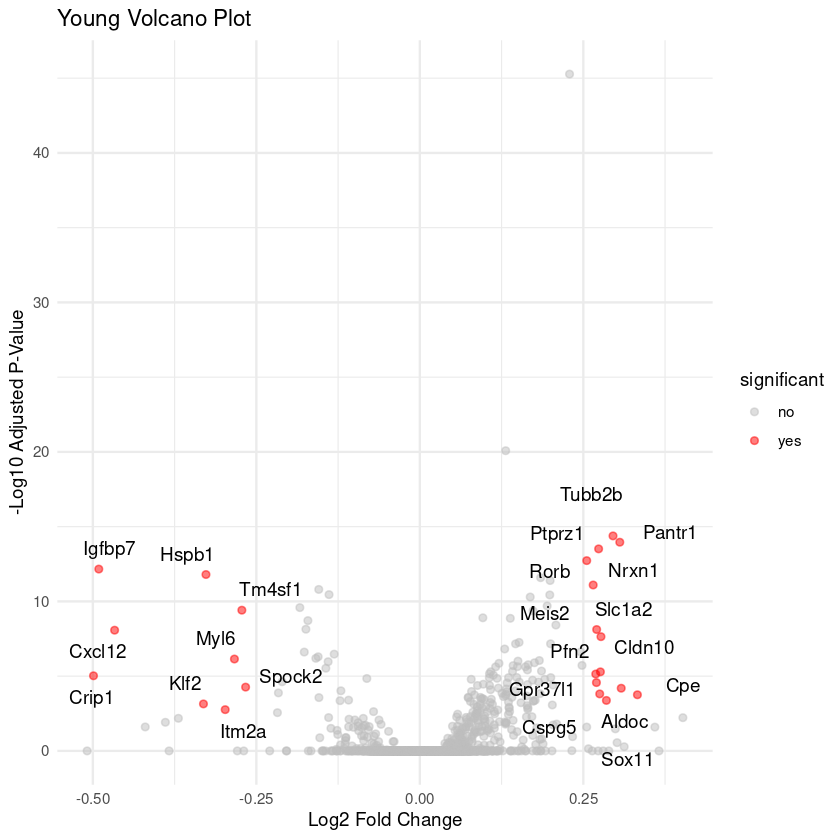

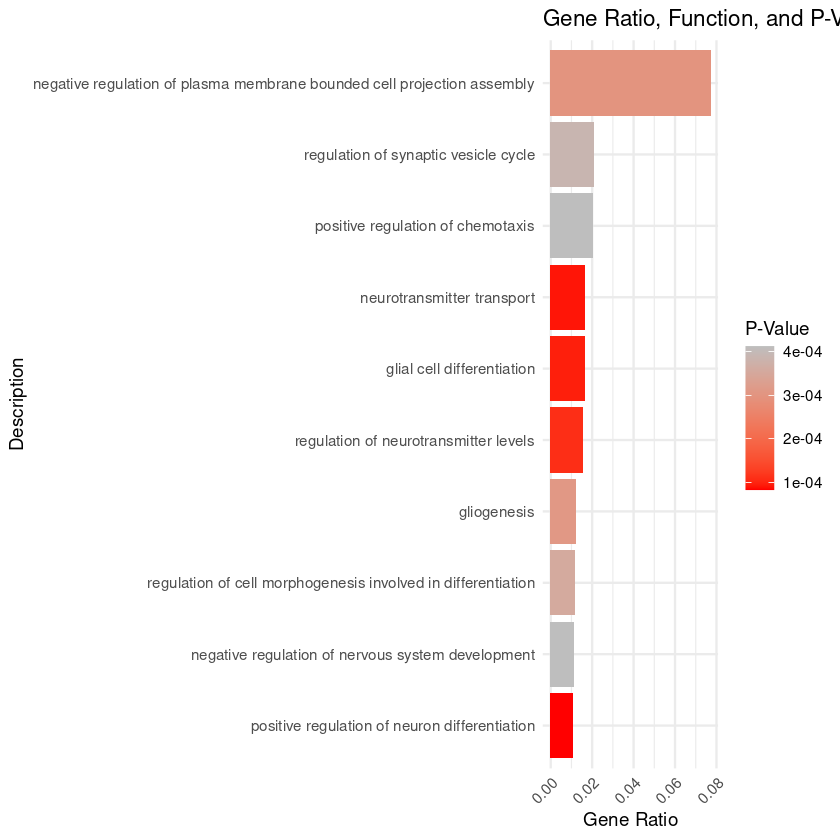

In [31]:
isoid <- c('BC11', 'BC12', 'BC23', 'BC24')
hetid <- c('BC2', 'BC8', 'BC14', 'BC22')


isoname <- "YoungIso"
hetname <- "YoungHet"
prefix <- "Young"


metadata$group <- ifelse(metadata$ID %in% isoid, isoname, 
                     ifelse(metadata$ID %in% hetid, hetname, NA))
data@meta.data <- metadata

de_results <- FindMarkers(data, ident.1 = hetname, ident.2 = isoname, group.by = "group", logfc.threshold = 0)
de_results <- de_results %>%
                mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))

significantdata <- de_results %>% filter(significant == "yes")

significantgenes <- rownames(significantdata)

volcano_plot <- ggplot(de_results, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
                geom_point(aes(color = significant), alpha = 0.5) +
                scale_color_manual(values = c("no" = "grey", "yes" = "red")) +
                theme_minimal() +
                labs(title = paste(prefix, "Volcano Plot"), x = "Log2 Fold Change", y = "-Log10 Adjusted P-Value") +
                geom_text_repel(data = de_results[de_results$significant == 'yes',], aes(label = significantgenes), 
                          max.overlaps = 200, box.padding = 0.5, force = 1, segment.color = NA)


ggsave(paste0("figures/gene_ontology/", prefix, "VolcanoPlot.png"), volcano_plot, width = 10, height = 10)
volcano_plot

geneIDs <- list(select(org.Mm.eg.db, keys = significantgenes, columns = c("ENTREZID"), keytype = "SYMBOL")$ENTREZID)

geneIDs <- as.numeric(as.character(unlist(geneIDs[[1]])))

ego <- enrichGO(gene = geneIDs,
            OrgDb = org.Mm.eg.db,
            keyType = "ENTREZID",
            ont = "BP",
            pAdjustMethod = "BH",
            pvalueCutoff = 0.05,
            qvalueCutoff = 0.05)

egowithgenenames <- as.data.frame(ego) %>%
rowwise() %>%
mutate(gene_names = idstoname(geneID))

egowithgenenames <- ungroup(egowithgenenames)

egowithgenenames <- egowithgenenames %>%
  mutate(TermCoverage = as.numeric(str_extract(GeneRatio, "^[0-9]+"))/as.numeric(str_extract(BgRatio, "^[0-9]+")))


bottom10pvalues <- egowithgenenames[order(egowithgenenames$pvalue),][1:10,]

plot <- ggplot(bottom10pvalues,
           aes(x = fct_reorder(Description, TermCoverage), y = TermCoverage, fill = pvalue)) +
        geom_bar(stat = "identity") +
        scale_fill_gradient(low = "red", high = "grey") +
        labs(title = "Gene Ratio, Function, and P-Value",
             x = "Description",
             y = "Gene Ratio",
             fill = "P-Value") +
        theme_minimal() +
        theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot <- plot + coord_flip()

# Save the plot with adjusted dimensions
ggsave(paste0("figures/gene_ontology/", prefix, "GeneRatio_plot_pvalue.png"), plot, width = 15, height = 6)

plot

In [39]:
celltypes <- unique(data$Celltype)

In [44]:
isoid <- c('BC3', 'BC4', 'BC6', 'BC5', 'BC9', 'BC10')
hetid <- c('BC1', 'BC7', 'BC13', 'BC21')
isoname <- "OldIso"
hetname <- "OldHet"
prefix <- "Old"

metadata$group <- ifelse(metadata$ID %in% isoid, isoname, 
                     ifelse(metadata$ID %in% hetid, hetname, NA))
data@meta.data <- metadata


for (celltype in celltypes[-c(1, 2, 3, 4, 5, 6)]) {
    prefix <- "Old"

    print(celltype)
    prefix = paste(celltype, prefix)
    
    de_results <- FindMarkers(subset(data, subset = Celltype == celltype), ident.1 = hetname, ident.2 = isoname, group.by = "group", logfc.threshold = 0)
    de_results <- de_results %>%
                    mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))
    significantdata <- de_results %>% filter(significant == "yes")
    
    significantgenes <- rownames(significantdata)

    volcano_plot <- ggplot(de_results, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
                geom_point(aes(color = significant), alpha = 0.5) +
                scale_color_manual(values = c("no" = "grey", "yes" = "red")) +
                theme_minimal() +
                labs(title = paste(prefix, "Volcano Plot"), x = "Log2 Fold Change", y = "-Log10 Adjusted P-Value") +
                geom_text_repel(data = de_results[de_results$significant == 'yes',], aes(label = significantgenes), 
                          max.overlaps = 200, box.padding = 0.5, force = 1, segment.color = NA)
    
    ggsave(paste0("figures/gene_ontology/", prefix, "VolcanoPlot.png"), volcano_plot, width = 10, height = 10)

    volcano_plot

    geneIDs <- list(select(org.Mm.eg.db, keys = significantgenes, columns = c("ENTREZID"), keytype = "SYMBOL")$ENTREZID)

    geneIDs <- as.numeric(as.character(unlist(geneIDs[[1]])))
    
    ego <- enrichGO(gene = geneIDs,
                OrgDb = org.Mm.eg.db,
                keyType = "ENTREZID",
                ont = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05)
    
    if (!is.null(ego)){
        egowithgenenames <- as.data.frame(ego) %>%
            rowwise() %>%
            mutate(gene_names = idstoname(geneID))
            
        egowithgenenames <- ungroup(egowithgenenames)
        
        egowithgenenames <- egowithgenenames %>%
            mutate(TermCoverage = as.numeric(str_extract(GeneRatio, "^[0-9]+"))/as.numeric(str_extract(BgRatio, "^[0-9]+")))
    
        bottom10pvalues <- egowithgenenames[order(egowithgenenames$pvalue),][1:10,]
        
        plot <- ggplot(bottom10pvalues,
                   aes(x = fct_reorder(Description, TermCoverage), y = TermCoverage, fill = pvalue)) +
                geom_bar(stat = "identity") +
                scale_fill_gradient(low = "red", high = "grey") +
                labs(title = "Gene Ratio, Function, and P-Value",
                     x = "Description",
                     y = "Gene Ratio",
                     fill = "P-Value") +
                theme_minimal() +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))
        
        plot <- plot + coord_flip()
        
        # Save the plot with adjusted dimensions
        ggsave(paste0("figures/gene_ontology/", prefix, "GeneRatio_plot_pvalue.png"), plot, width = 15, height = 6)
        
        plot
    }
}

[1] "Neuroblast"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "Neuron"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "OPC"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "Macrophage_Tcell_NK"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "Ependymal"


ERROR: Error in WhichCells.Seurat(object = object, idents = ident.2): Cannot find the following identities in the object: OldIso


In [48]:
isoid <- c('BC11', 'BC12', 'BC23', 'BC24')
hetid <- c('BC2', 'BC8', 'BC14', 'BC22')
isoname <- "YoungIso"
hetname <- "YoungHet"
prefix <- "Young"


metadata$group <- ifelse(metadata$ID %in% isoid, isoname, 
                     ifelse(metadata$ID %in% hetid, hetname, NA))
data@meta.data <- metadata

for (celltype in celltypes[-c(1, 2, 3, 4, 5, 6, 7)]) {
    prefix <- "Young"

    print(celltype)
    prefix = paste(celltype, prefix)
    
    de_results <- FindMarkers(subset(data, subset = Celltype == celltype), ident.1 = hetname, ident.2 = isoname, group.by = "group", logfc.threshold = 0)
    de_results <- de_results %>%
                    mutate(significant = ifelse(p_val_adj < 0.005 & abs(avg_log2FC) > 0.25, "yes", "no"))
    significantdata <- de_results %>% filter(significant == "yes")
    
    significantgenes <- rownames(significantdata)

    volcano_plot <- ggplot(de_results, aes(x = avg_log2FC, y = -log10(p_val_adj))) +
                geom_point(aes(color = significant), alpha = 0.5) +
                scale_color_manual(values = c("no" = "grey", "yes" = "red")) +
                theme_minimal() +
                labs(title = paste(prefix, "Volcano Plot"), x = "Log2 Fold Change", y = "-Log10 Adjusted P-Value") +
                geom_text_repel(data = de_results[de_results$significant == 'yes',], aes(label = significantgenes), 
                          max.overlaps = 200, box.padding = 0.5, force = 1, segment.color = NA)
    
    ggsave(paste(prefix, "VolcanoPlot.png"), volcano_plot, width = 10, height = 10)

    volcano_plot

    geneIDs <- list(select(org.Mm.eg.db, keys = significantgenes, columns = c("ENTREZID"), keytype = "SYMBOL")$ENTREZID)

    geneIDs <- as.numeric(as.character(unlist(geneIDs[[1]])))
    
    ego <- enrichGO(gene = geneIDs,
                OrgDb = org.Mm.eg.db,
                keyType = "ENTREZID",
                ont = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05)
    
    if (!is.null(ego)){
        egowithgenenames <- as.data.frame(ego) %>%
            rowwise() %>%
            mutate(gene_names = idstoname(geneID))
            
        egowithgenenames <- ungroup(egowithgenenames)
        
        egowithgenenames <- egowithgenenames %>%
            mutate(TermCoverage = as.numeric(str_extract(GeneRatio, "^[0-9]+"))/as.numeric(str_extract(BgRatio, "^[0-9]+")))
    
        bottom10pvalues <- egowithgenenames[order(egowithgenenames$pvalue),][1:10,]
        
        plot <- ggplot(bottom10pvalues,
                   aes(x = fct_reorder(Description, TermCoverage), y = TermCoverage, fill = pvalue)) +
                geom_bar(stat = "identity") +
                scale_fill_gradient(low = "red", high = "grey") +
                labs(title = "Gene Ratio, Function, and P-Value",
                     x = "Description",
                     y = "Gene Ratio",
                     fill = "P-Value") +
                theme_minimal() +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))
        
        plot <- plot + coord_flip()
        
        # Save the plot with adjusted dimensions
        ggsave(paste(prefix, "GeneRatio_plot_pvalue.png"), plot, width = 15, height = 6)
        
        plot
    }
}

[1] "Neuron"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "OPC"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "Macrophage_Tcell_NK"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...



[1] "Ependymal"


--> No gene can be mapped....

--> Expected input gene ID: 72508,22339,12464,67946,723849,18595

--> return NULL...

